In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.max_rows = 60

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls "/content/drive/My Drive/NASA Challenge"

 20040809_ut01_gpsB.idx			        go_canada_map_data_en.gsheet
 2017_fc1.nc				        Info.gdoc
 8.09.2017_event.ipynb			        kp_clean_2016.xlsx
 Cleaning_Kp_data.ipynb			        kp_clean_2017.xlsx
'Copy of 2017_fc1.nc'			        kp_clean_2018.xlsx
'Copy of KP Values (1).gsheet'		        kp_clean_2019.xlsx
'Copy of KP Values.gsheet'		        kp_clean_2020.xlsx
'Copy of ms_kp_merged.csv'		        kp_clean_2021.xlsx
'Data from UK surface (kp and nT in X and Y)'   kp_clean_2022.xlsx
 df17_pnotna.xlsx			        kp_clean_2023.xlsx
'Dina_Exploring data.ipynb'		        KP_Values_Dina.xlsx
 dsc_fc_summed_spectra_2016_v01.csv	       'KP Values.gsheet'
 dsc_fc_summed_spectra_2017_v01.csv	        Links.gdoc
 dsc_fc_summed_spectra_2018_v01.csv	        magfield_kp_merged.csv
 dsc_fc_summed_spectra_2019_v01.csv	       'Magnetic Field Data'
 dsc_fc_summed_spectra_2020_v01.csv	        merge_data.ipynb
 dsc_fc_summed_spectra_2021_v01.csv	        ModeloRL
 dsc_fc_summed_spectra_2022_v01.csv	       '

Data sets from DSCOVR Faradey Cup (2016 - 2020 - ok, 2021 - 2023 - distored data):

In [6]:
dsc_fc_2016 = "/content/drive/My Drive/NASA Challenge/dsc_fc_summed_spectra_2016_v01.csv"
dsc_fc_2017 = "/content/drive/My Drive/NASA Challenge/dsc_fc_summed_spectra_2017_v01.csv"
dsc_fc_2018 = "/content/drive/My Drive/NASA Challenge/dsc_fc_summed_spectra_2018_v01.csv"
dsc_fc_2019 = "/content/drive/My Drive/NASA Challenge/dsc_fc_summed_spectra_2019_v01.csv"
dsc_fc_2020 = "/content/drive/My Drive/NASA Challenge/dsc_fc_summed_spectra_2020_v01.csv"
dsc_fc_2021 = "/content/drive/My Drive/NASA Challenge/dsc_fc_summed_spectra_2021_v01.csv"
dsc_fc_2022 = "/content/drive/My Drive/NASA Challenge/dsc_fc_summed_spectra_2022_v01.csv"
dsc_fc_2023 = "/content/drive/My Drive/NASA Challenge/dsc_fc_summed_spectra_2023_v01.csv"

In [7]:
df = pd.read_csv(dsc_fc_2017)
df.head()


,2017-01-01 00:00:00,-4.17863,-4.51183,-3.52434,0,0.1,0.2,0.3,0.4,0.5,...,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30
0,2017-01-01 00:01:00,-6.06788,-0.379552,-3.49708,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01 00:02:00,-5.83430,-3.039940,-2.98546,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-01 00:03:00,-5.87318,-3.352910,-2.77476,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01 00:04:00,-5.81431,-3.305190,-2.59870,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-01 00:05:00,-6.23986,-3.240720,-1.01048,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
prtcles = [f'p_{x}' for x in range(0,50)]
vctr = ['vec_1', 'vec_2', 'vec_3']
df.columns = ['Timestamp'] + vctr + prtcles
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()

,Timestamp,vec_1,vec_2,vec_3,p_0,p_1,p_2,p_3,p_4,p_5,...,p_40,p_41,p_42,p_43,p_44,p_45,p_46,p_47,p_48,p_49
0,2017-01-01 00:01:00,-6.06788,-0.379552,-3.49708,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01 00:02:00,-5.83430,-3.039940,-2.98546,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-01 00:03:00,-5.87318,-3.352910,-2.77476,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01 00:04:00,-5.81431,-3.305190,-2.59870,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-01 00:05:00,-6.23986,-3.240720,-1.01048,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.describe()
##df.info()

,vec_1,vec_2,vec_3,p_0,p_1,p_2,p_3,p_4,p_5,p_6,...,p_40,p_41,p_42,p_43,p_44,p_45,p_46,p_47,p_48,p_49
count,524527.000000,524527.000000,524527.000000,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,...,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000
mean,-0.251026,0.337124,-0.030248,9.680566,8.721736,25.564215,34.968190,51.384771,60.201449,85.960094,...,58.460611,41.496312,38.557812,28.786793,23.588031,16.275161,14.969090,12.264756,13.259231,10.475651
std,3.534636,3.650758,2.880759,47.737093,34.931206,76.667085,87.120103,110.112511,122.716176,156.605733,...,147.351168,117.515428,121.094226,104.824945,91.898345,79.451451,77.003537,68.319796,75.434919,63.335374
min,-20.060900,-20.647900,-33.324400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.935405,-2.128815,-1.518050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.393375,0.300109,-0.020698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.490950,2.656220,1.456780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,194.536000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.462200,27.893800,20.102800,462.628000,499.673000,587.183000,723.864000,929.494000,1735.030000,2270.620000,...,733.651000,622.058000,662.190000,861.944000,696.414000,890.223000,1084.300000,1183.310000,771.201000,846.254000


In [10]:
df.replace(0, np.nan, inplace=True)
inf = df.describe()
inf = inf.T.reset_index()
inf.rename(columns={'index': 'prtcls'}, inplace=True)
inf_p = inf.iloc[3:]
#inf_p.set_index('prtcls', inplace=True)
inf_p

,prtcls,count,mean,std,min,25%,50%,75%,max
3,p_0,21227.0,239.699232,35.923133,119.344000,202.97750,252.4370,260.09800,462.628
4,p_1,34889.0,131.392011,47.583120,0.231726,96.47030,141.7390,150.87100,499.673
5,p_2,54529.0,246.410643,47.295791,0.899638,226.40700,252.4050,261.09400,587.183
6,p_3,77869.0,236.027763,61.437658,0.231726,209.15700,236.1640,248.64100,723.864
7,p_4,103292.0,261.470244,82.252300,0.231726,224.73475,253.3965,268.14325,929.494
8,p_5,126193.0,250.741495,122.254387,0.231726,195.21100,226.0780,254.26100,1735.030
9,p_6,154014.0,293.353457,151.186576,0.231726,219.62950,252.7175,300.77000,2270.620
10,p_7,182378.0,298.244277,189.280453,0.231726,196.73525,235.3570,321.79000,2948.610
11,p_8,213968.0,382.796637,151.996659,0.231726,292.80700,325.8695,419.94075,2449.860
12,p_9,237368.0,342.887394,181.981164,0.231726,226.50175,276.2095,422.07425,2210.600


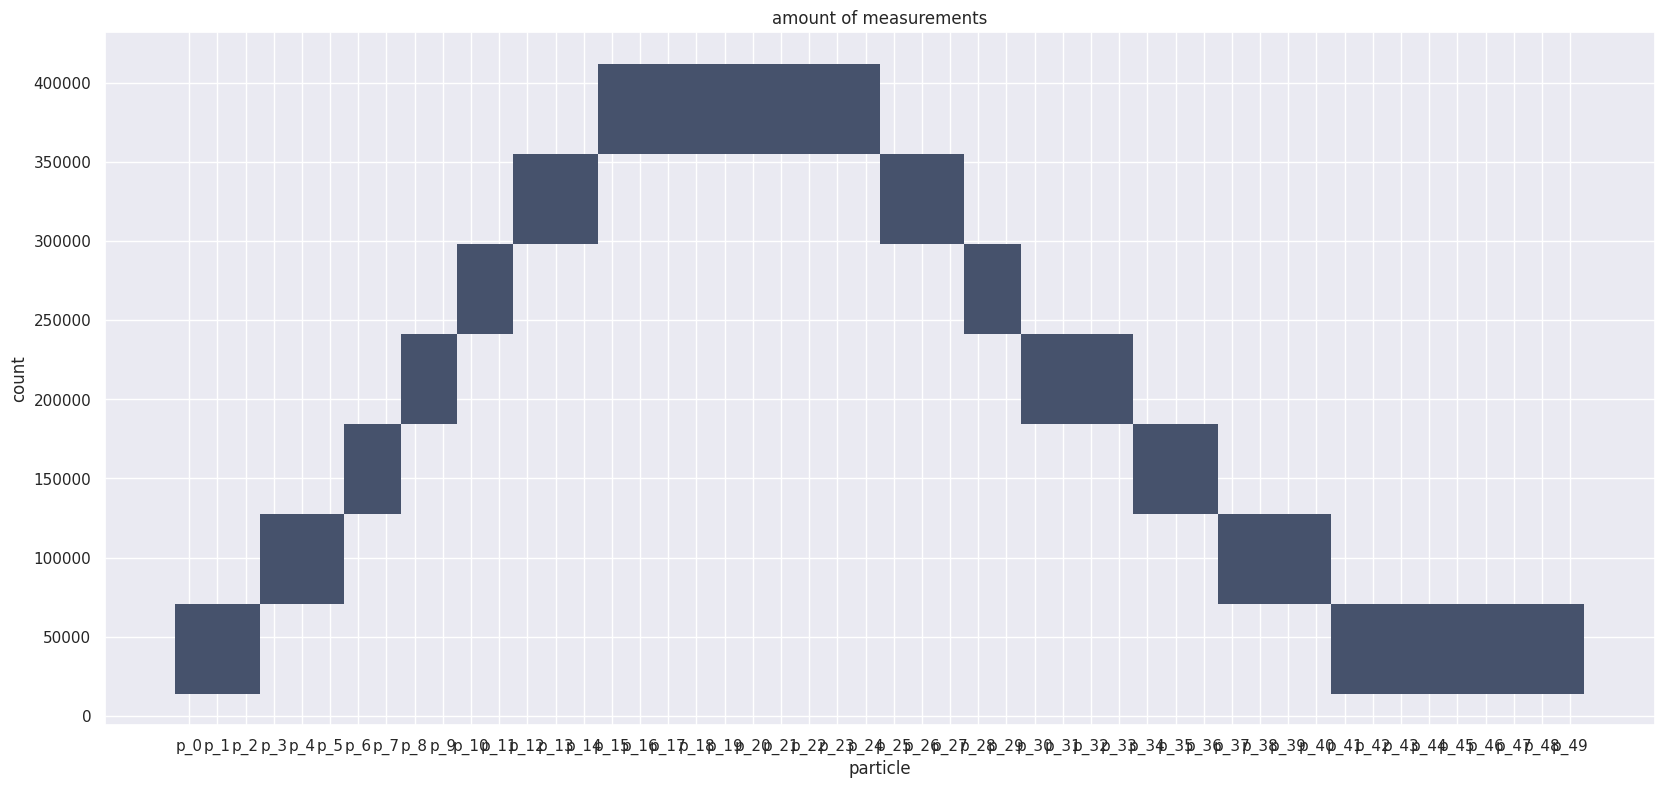

In [11]:
#plt.figure(figsize=(10, 6))
sns.set(rc={'figure.figsize':(20, 9)})
sns.histplot(x=inf_p['prtcls'], y=inf_p['count'])
plt.xlabel('particle')
plt.ylabel('count')
plt.title('amount of measurements')
plt.grid(True)
plt.show()

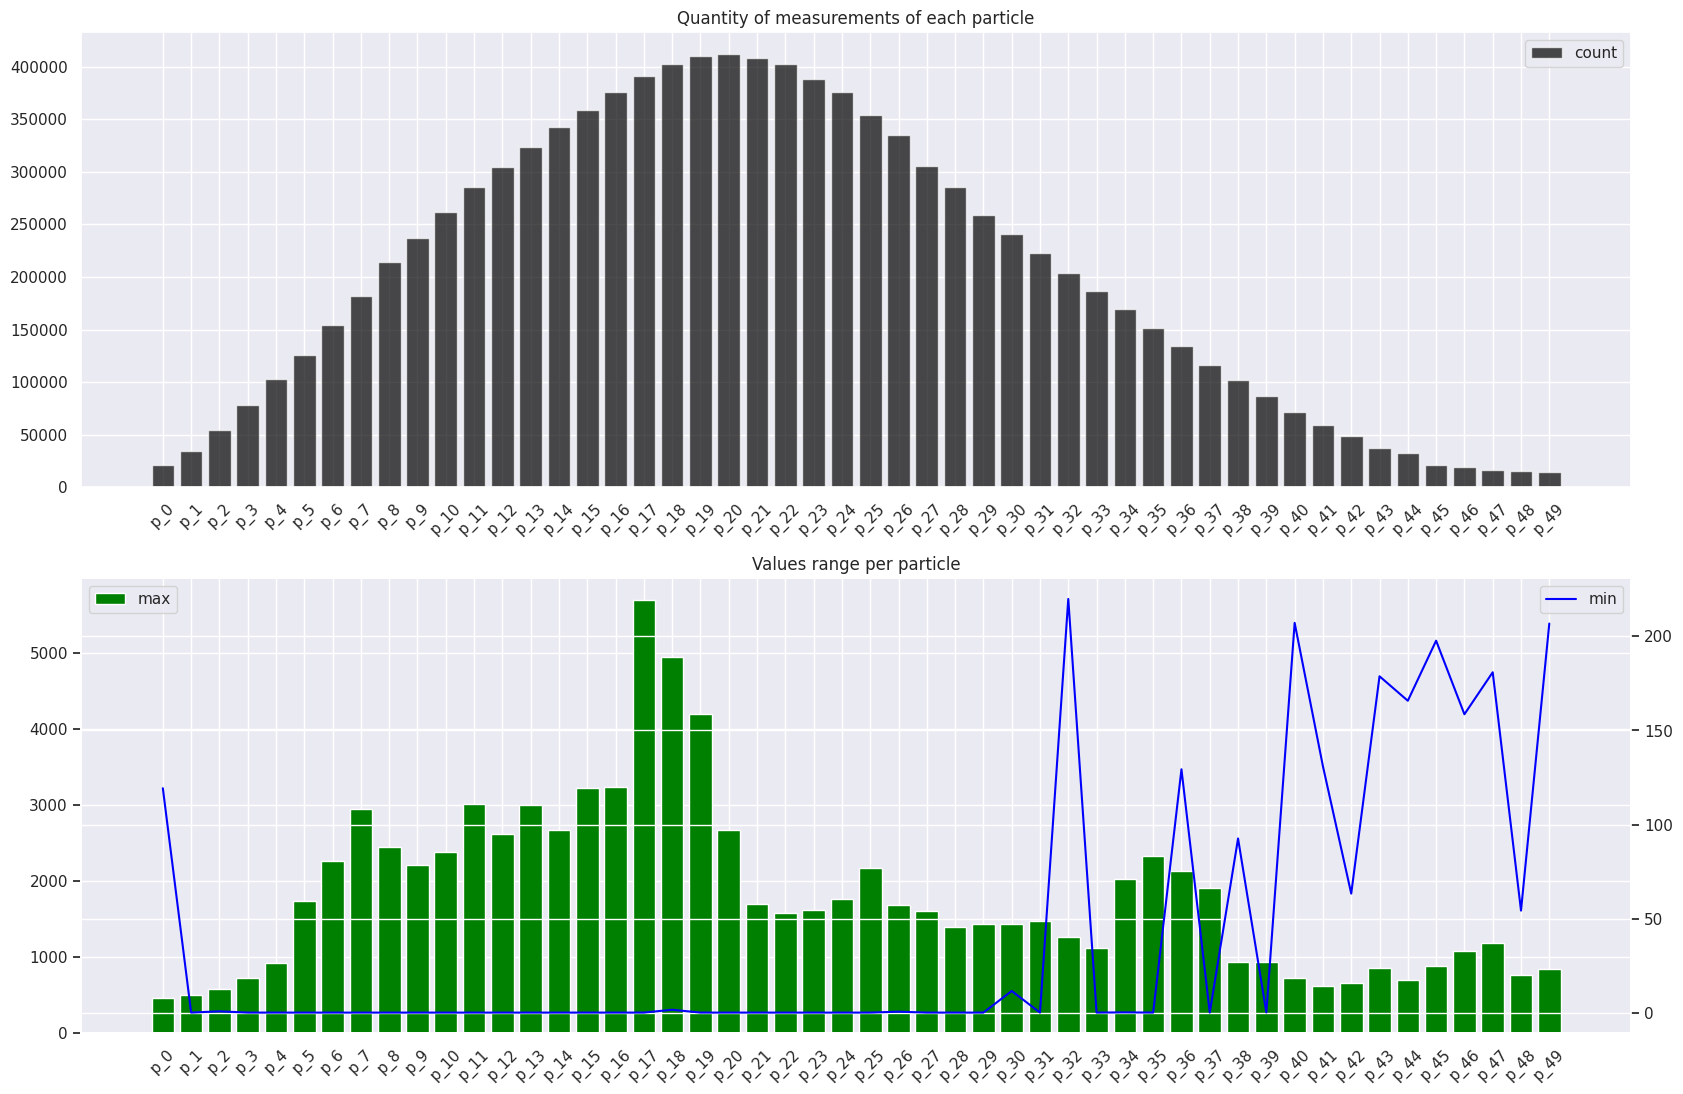

In [12]:
gridsize = (2, 1)
fig = plt.figure(figsize=(20, 13))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=1)

ax1.bar(inf_p['prtcls'], inf_p['count'], color = 'black', alpha=.7, label = 'count')
ax1.set_title('Quantity of measurements of each particle')
ax1.legend(loc = 'upper right')
ax2.bar(inf_p['prtcls'], inf_p['max'], color = 'green', label = 'max')
ax21 = ax2.twinx()
ax21.plot(inf_p['prtcls'], inf_p['min'], color = 'blue', label = 'min')
ax2.set_title('Values range per particle')
ax2.legend(loc = 'upper left')
ax21.legend(loc = 'upper right')

ax1.xaxis.set_tick_params(rotation=45)
ax2.xaxis.set_tick_params(rotation=45)
plt.show()


In [13]:
import datetime as dt

df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day

df

,Timestamp,vec_1,vec_2,vec_3,p_0,p_1,p_2,p_3,p_4,p_5,...,p_42,p_43,p_44,p_45,p_46,p_47,p_48,p_49,month,day
0,2017-01-01 00:01:00,-6.06788,-0.379552,-3.49708,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,2017-01-01 00:02:00,-5.83430,-3.039940,-2.98546,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,2017-01-01 00:03:00,-5.87318,-3.352910,-2.77476,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,2017-01-01 00:04:00,-5.81431,-3.305190,-2.59870,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,2017-01-01 00:05:00,-6.23986,-3.240720,-1.01048,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525594,2017-12-31 23:55:00,6.07246,-3.402390,-4.20657,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,31
525595,2017-12-31 23:56:00,6.94467,-3.434060,-4.33012,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,31
525596,2017-12-31 23:57:00,7.04210,-1.602740,-5.85800,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,31
525597,2017-12-31 23:58:00,6.74641,0.337871,-6.33095,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,31


In [14]:
df_ag = df.groupby('month').count()
df_ag

,Timestamp,vec_1,vec_2,vec_3,p_0,p_1,p_2,p_3,p_4,p_5,...,p_41,p_42,p_43,p_44,p_45,p_46,p_47,p_48,p_49,day
month,,,,,,,,,,,,,,,,,,,,,
1,44639,44637,44637,44637,1818,2662,4738,6448,7625,8708,...,7332,6171,4891,4052,2897,2711,2518,2438,2168,44639
2,40320,40296,40296,40296,2549,3240,4561,5495,6148,7464,...,4971,3992,3202,2810,2579,2277,1991,1592,1226,40320
3,44640,44640,44640,44640,1273,3495,6179,7914,9167,10456,...,12290,9891,7075,5998,1833,1102,562,516,482,44640
4,43200,43200,43200,43200,1068,2798,4159,5144,6046,7385,...,4920,4359,3742,3581,2512,2368,1706,1683,1281,43200
5,44640,44639,44639,44639,2221,2941,4589,7342,11434,15097,...,2012,1441,1281,1049,848,755,563,551,517,44640
6,43200,43170,43170,43170,4331,5987,8085,11362,14404,16442,...,638,618,618,617,617,617,614,614,613,43200
7,44640,44040,44040,44040,988,2433,4437,6813,9519,11153,...,3484,2731,2235,2046,1888,1837,1794,1750,1528,44640
8,44640,44402,44402,44402,147,548,1190,3663,5714,7732,...,8290,7455,6421,6199,5453,5385,5235,5205,4974,44640
9,43200,43192,43192,43192,295,1101,2308,3836,5319,6768,...,10049,8423,5416,4530,2217,1937,1499,1376,1204,43200


In [15]:
df_p20 = df[df['p_20'].notnull()]
df_p20.describe()

,vec_1,vec_2,vec_3,p_0,p_1,p_2,p_3,p_4,p_5,p_6,...,p_42,p_43,p_44,p_45,p_46,p_47,p_48,p_49,month,day
count,412122.000000,412122.000000,412122.000000,235.000000,4050.000000,23690.000000,47029.000000,72452.000000,95353.000000,123171.000000,...,8036.000000,6660.000000,5652.000000,4696.000000,4281.000000,4054.000000,3831.000000,3510.000000,412122.000000,412122.000000
mean,-0.363323,0.415605,-0.003268,241.105545,120.785810,234.405516,217.430650,235.058501,207.800645,240.441592,...,422.187567,410.846757,382.841306,400.693995,400.315199,373.892130,425.271670,377.984755,6.677435,15.600856
std,3.578096,3.674256,2.886896,38.248506,35.653792,32.340654,34.204874,35.528151,42.445042,50.208040,...,30.907839,33.635124,35.116902,35.367548,35.011878,32.763846,31.237834,31.681765,3.474259,8.671802
min,-20.060900,-20.647900,-31.836100,119.344000,0.231726,0.899638,0.231726,0.231726,0.231726,0.231726,...,199.416000,178.774000,165.782000,197.666000,158.607000,182.103000,241.000000,206.776000,1.000000,1.000000
25%,-3.079438,-2.026910,-1.471420,213.599000,98.269525,221.447250,201.246000,208.696750,177.702000,205.855500,...,401.356250,389.237750,361.327000,380.865750,381.444000,357.092000,406.570500,360.307000,4.000000,8.000000
50%,-0.580948,0.372304,0.004278,252.283000,135.127000,247.782500,229.640000,245.943500,215.895000,241.691000,...,422.858000,412.379500,383.697000,401.624500,403.612000,373.833000,425.312000,379.805500,7.000000,15.000000
75%,2.435107,2.702608,1.461358,263.707500,145.801750,256.092750,241.112000,258.975250,235.588000,266.223000,...,441.993750,431.634750,404.960250,421.228000,420.240000,390.808250,445.355000,396.523000,10.000000,23.000000
max,15.497000,27.893800,20.102800,462.628000,499.673000,468.673000,564.400000,662.784000,604.088000,851.230000,...,662.190000,703.541000,630.467000,786.534000,648.222000,653.786000,771.201000,677.952000,12.000000,31.000000


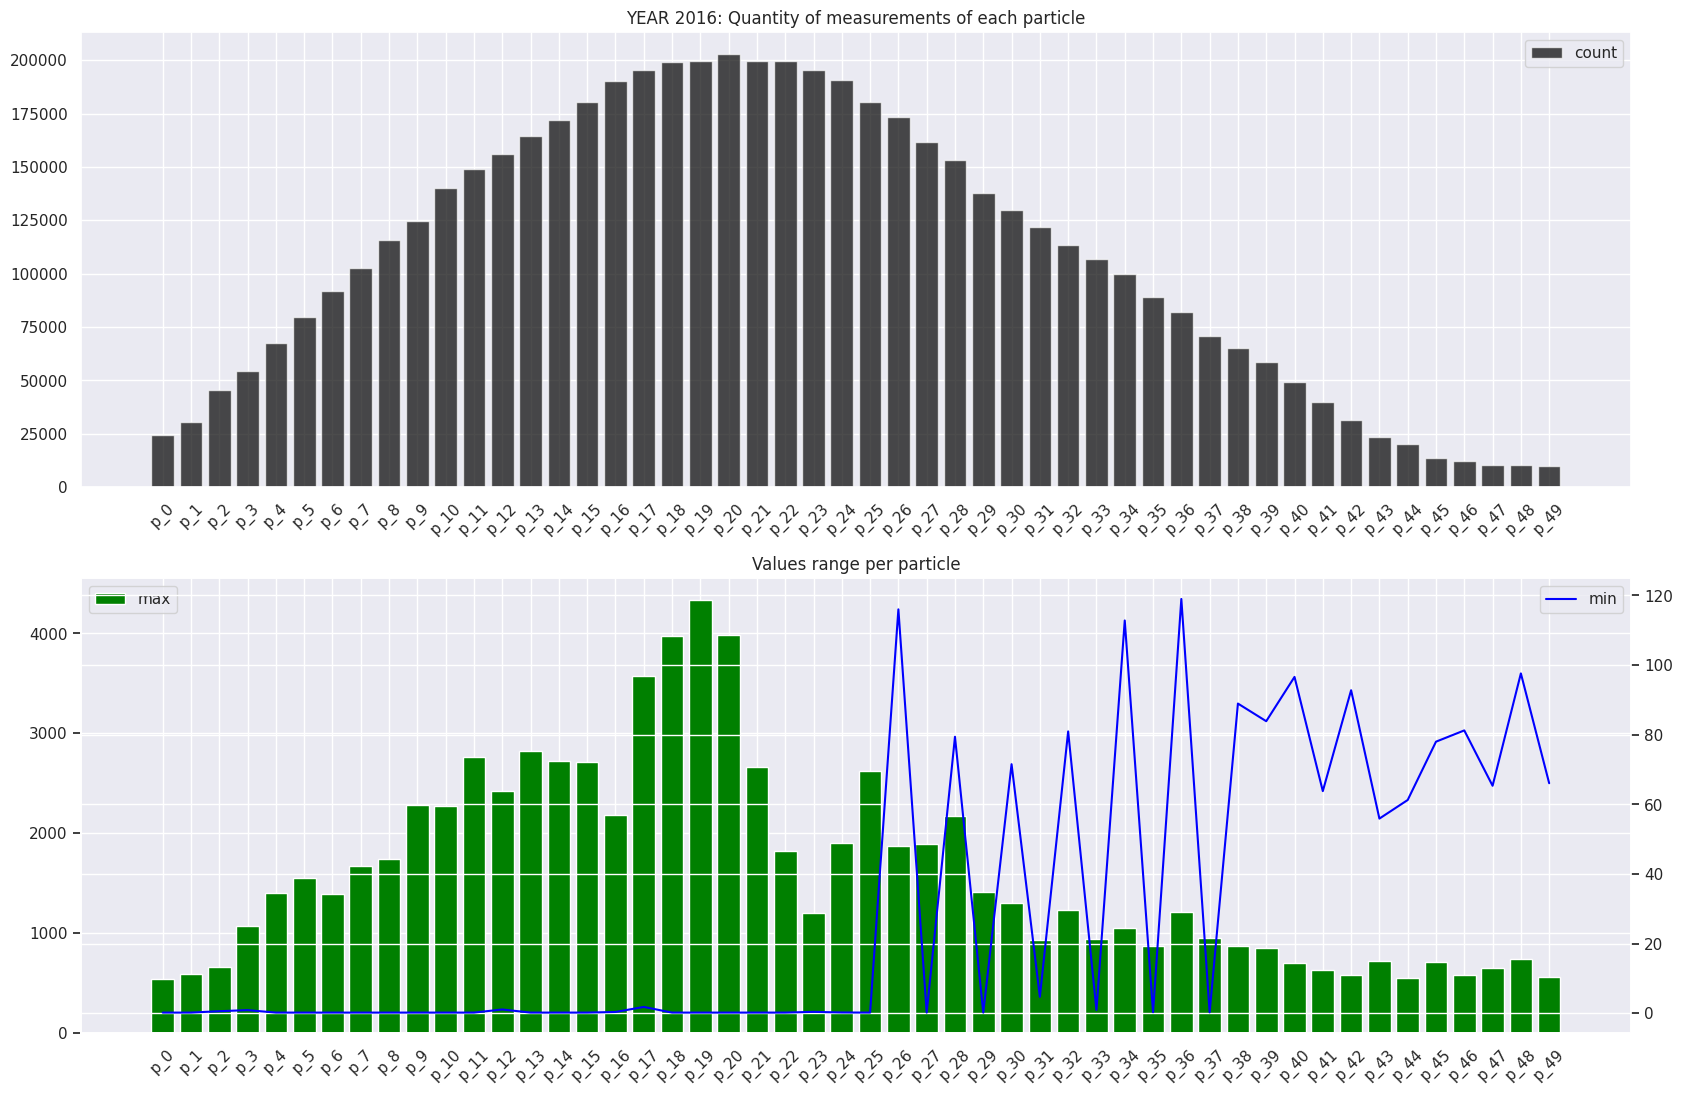

In [16]:
df16 = pd.read_csv(dsc_fc_2016)
prtcles16 = [f'p_{x}' for x in range(0,50)]
vctr16 = ['vec_1', 'vec_2', 'vec_3']
df16.columns = ['Timestamp'] + vctr16 + prtcles16
df16['Timestamp'] = pd.to_datetime(df16['Timestamp'])
df16.replace(0, np.nan, inplace=True)
inf16 = df16.describe()
inf16 = inf16.T.reset_index()
inf16.rename(columns={'index': 'prtcls'}, inplace=True)
inf16_p = inf16.iloc[3:]

gridsize = (2, 1)
fig = plt.figure(figsize=(20, 13))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=1)

ax1.bar(inf16_p['prtcls'], inf16_p['count'], color = 'black', alpha=.7, label = 'count')
ax1.set_title('YEAR 2016: Quantity of measurements of each particle')
ax1.legend(loc = 'upper right')
ax2.bar(inf16_p['prtcls'], inf16_p['max'], color = 'green', label = 'max')
ax21 = ax2.twinx()
ax21.plot(inf16_p['prtcls'], inf16_p['min'], color = 'blue', label = 'min')
ax2.set_title('Values range per particle')
ax2.legend(loc = 'upper left')
ax21.legend(loc = 'upper right')

ax1.xaxis.set_tick_params(rotation=45)
ax2.xaxis.set_tick_params(rotation=45)
plt.show()

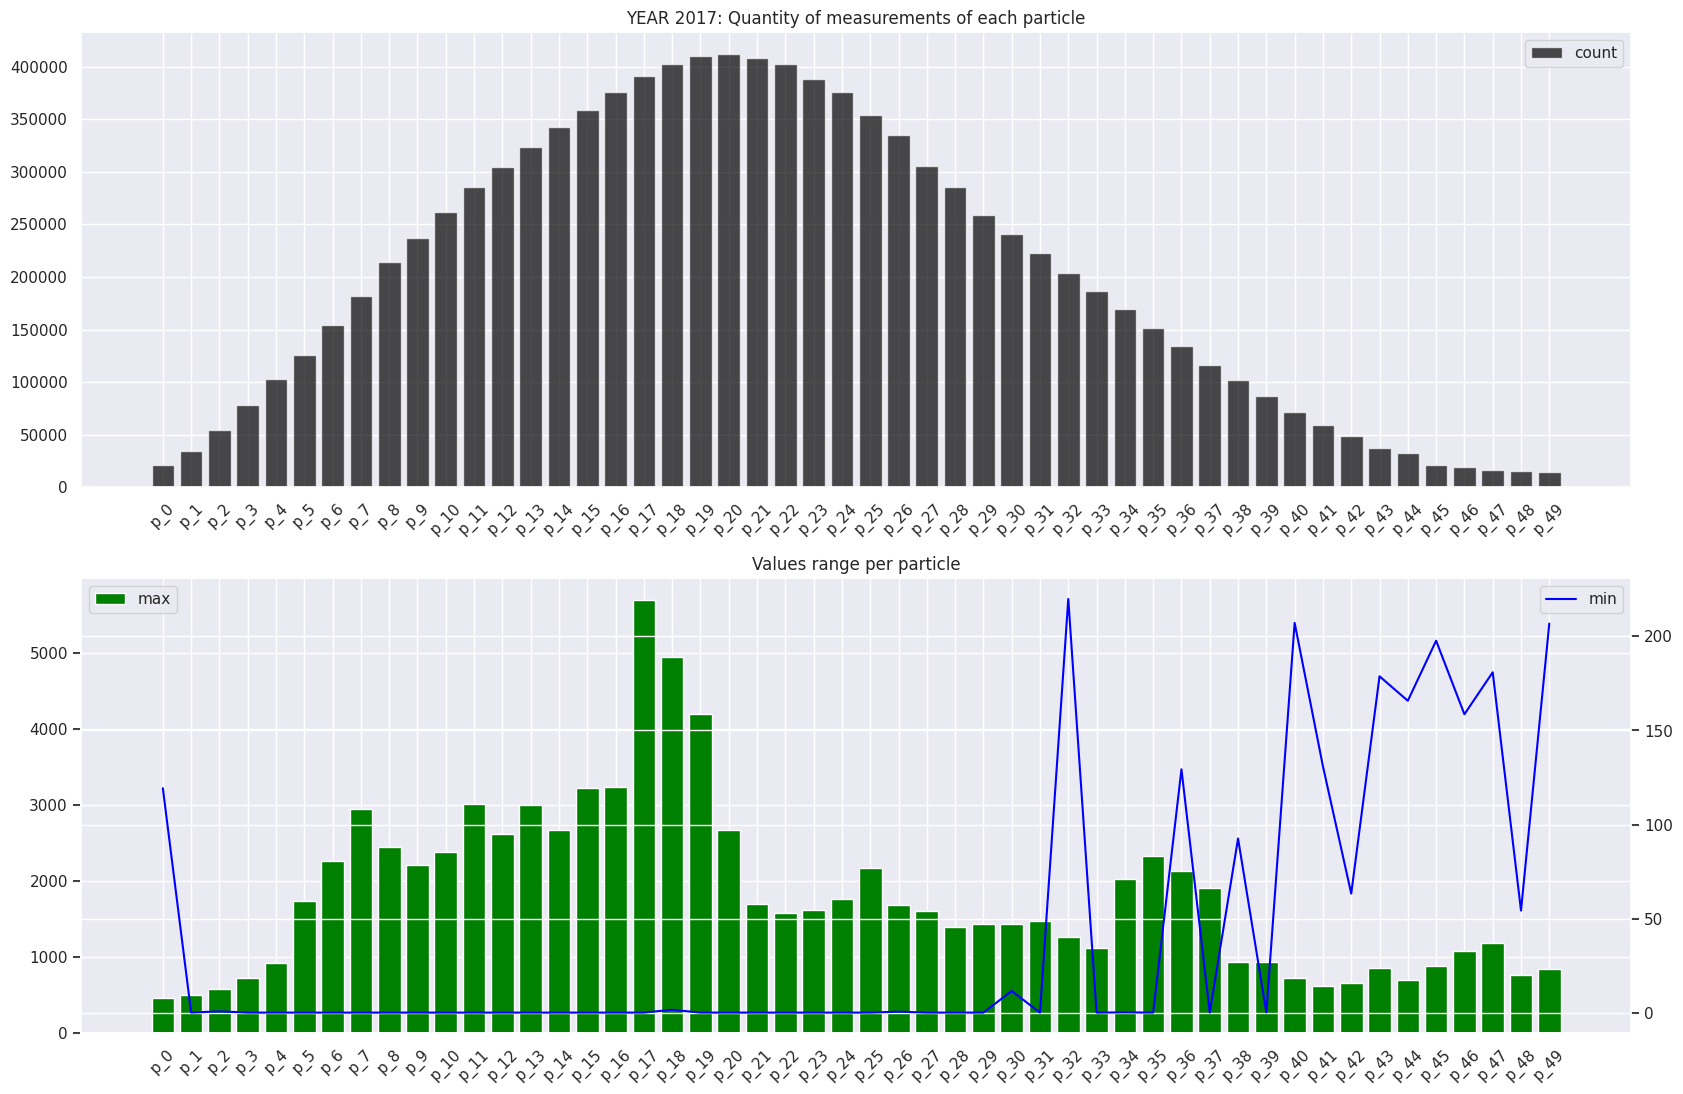

In [17]:
df17 = pd.read_csv(dsc_fc_2017)
prtcles17 = [f'p_{x}' for x in range(0,50)]
vctr17 = ['vec_1', 'vec_2', 'vec_3']
df17.columns = ['Timestamp'] + vctr17 + prtcles17
df17['Timestamp'] = pd.to_datetime(df17['Timestamp'])
df17.replace(0, np.nan, inplace=True)
inf17 = df17.describe()
inf17 = inf17.T.reset_index()
inf17.rename(columns={'index': 'prtcls'}, inplace=True)
inf17_p = inf17.iloc[3:]

gridsize = (2, 1)
fig = plt.figure(figsize=(20, 13))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=1)

ax1.bar(inf17_p['prtcls'], inf17_p['count'], color = 'black', alpha=.7, label = 'count')
ax1.set_title('YEAR 2017: Quantity of measurements of each particle')
ax1.legend(loc = 'upper right')
ax2.bar(inf17_p['prtcls'], inf17_p['max'], color = 'green', label = 'max')
ax21 = ax2.twinx()
ax21.plot(inf17_p['prtcls'], inf17_p['min'], color = 'blue', label = 'min')
ax2.set_title('Values range per particle')
ax2.legend(loc = 'upper left')
ax21.legend(loc = 'upper right')

ax1.xaxis.set_tick_params(rotation=45)
ax2.xaxis.set_tick_params(rotation=45)
plt.show()

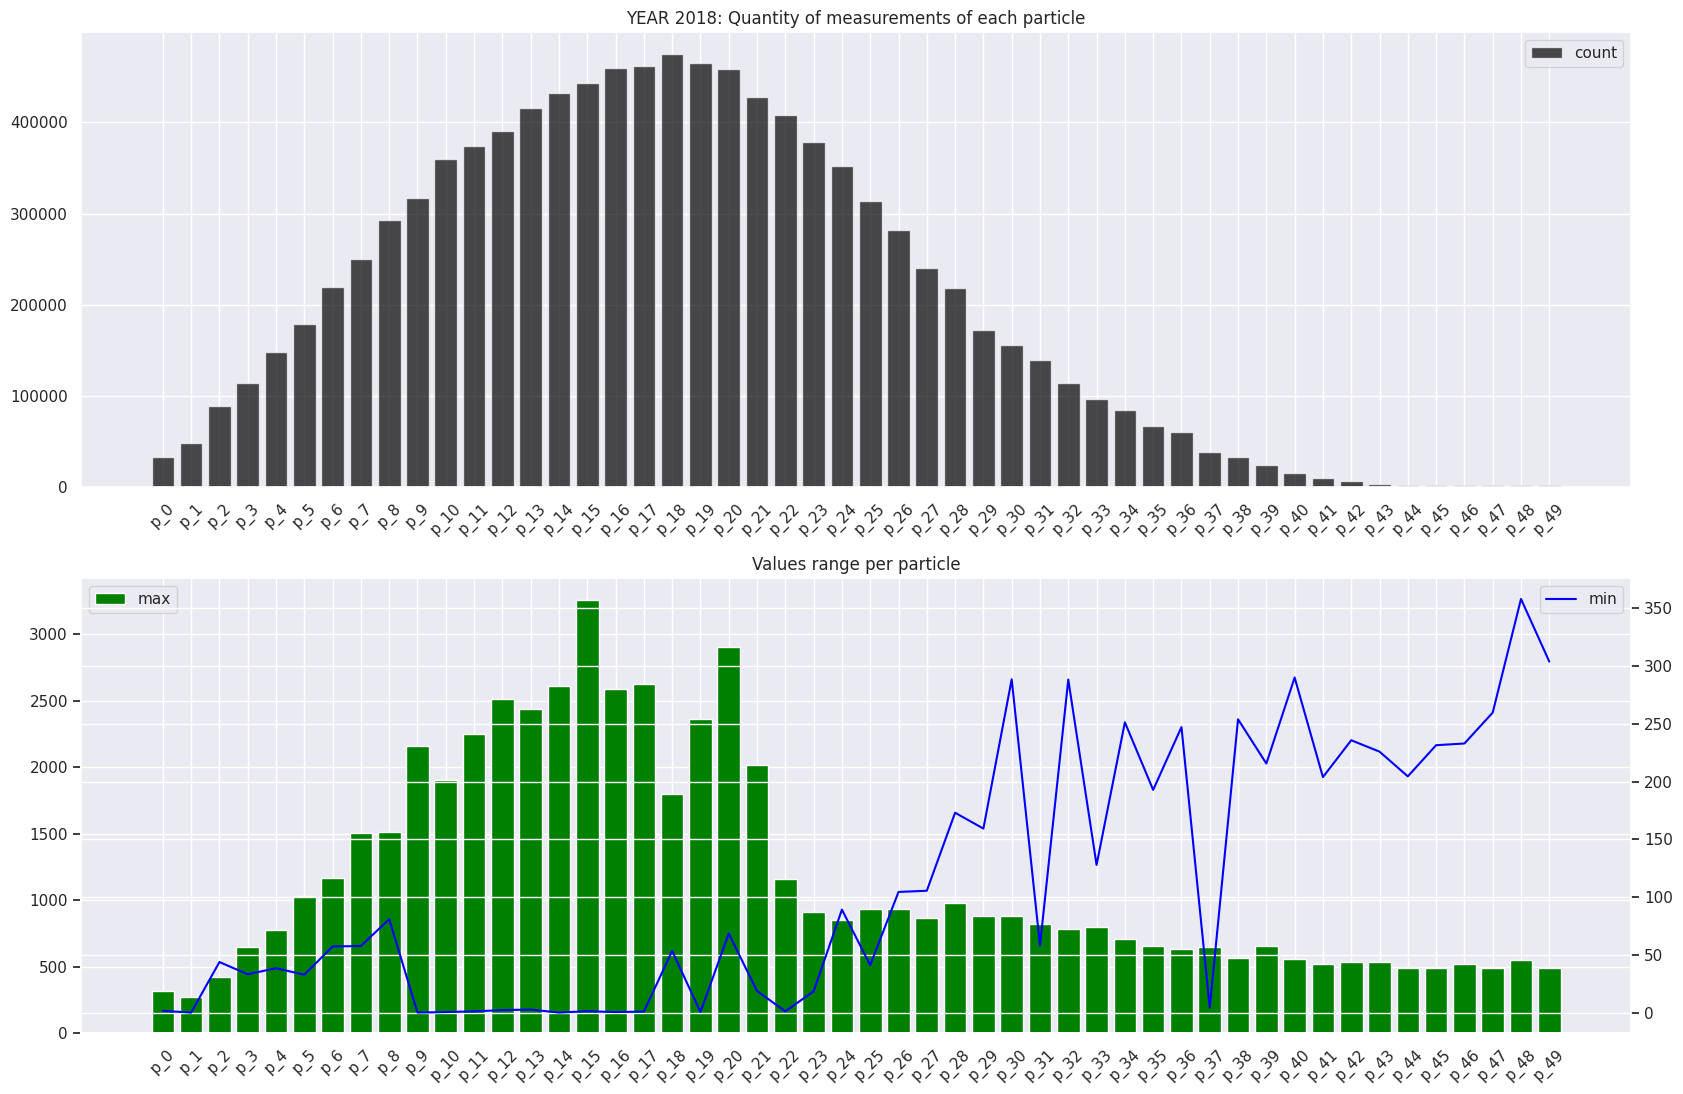

In [18]:
df18 = pd.read_csv(dsc_fc_2018)
prtcles18 = [f'p_{x}' for x in range(0,50)]
vctr18 = ['vec_1', 'vec_2', 'vec_3']
df18.columns = ['Timestamp'] + vctr18 + prtcles18
df18['Timestamp'] = pd.to_datetime(df18['Timestamp'])
df18.replace(0, np.nan, inplace=True)
inf18 = df18.describe()
inf18 = inf18.T.reset_index()
inf18.rename(columns={'index': 'prtcls'}, inplace=True)
inf18_p = inf18.iloc[3:]

gridsize = (2, 1)
fig = plt.figure(figsize=(20, 13))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=1)

ax1.bar(inf18_p['prtcls'], inf18_p['count'], color = 'black', alpha=.7, label = 'count')
ax1.set_title('YEAR 2018: Quantity of measurements of each particle')
ax1.legend(loc = 'upper right')
ax2.bar(inf18_p['prtcls'], inf18_p['max'], color = 'green', label = 'max')
ax21 = ax2.twinx()
ax21.plot(inf18_p['prtcls'], inf18_p['min'], color = 'blue', label = 'min')
ax2.set_title('Values range per particle')
ax2.legend(loc = 'upper left')
ax21.legend(loc = 'upper right')

ax1.xaxis.set_tick_params(rotation=45)
ax2.xaxis.set_tick_params(rotation=45)
plt.show()

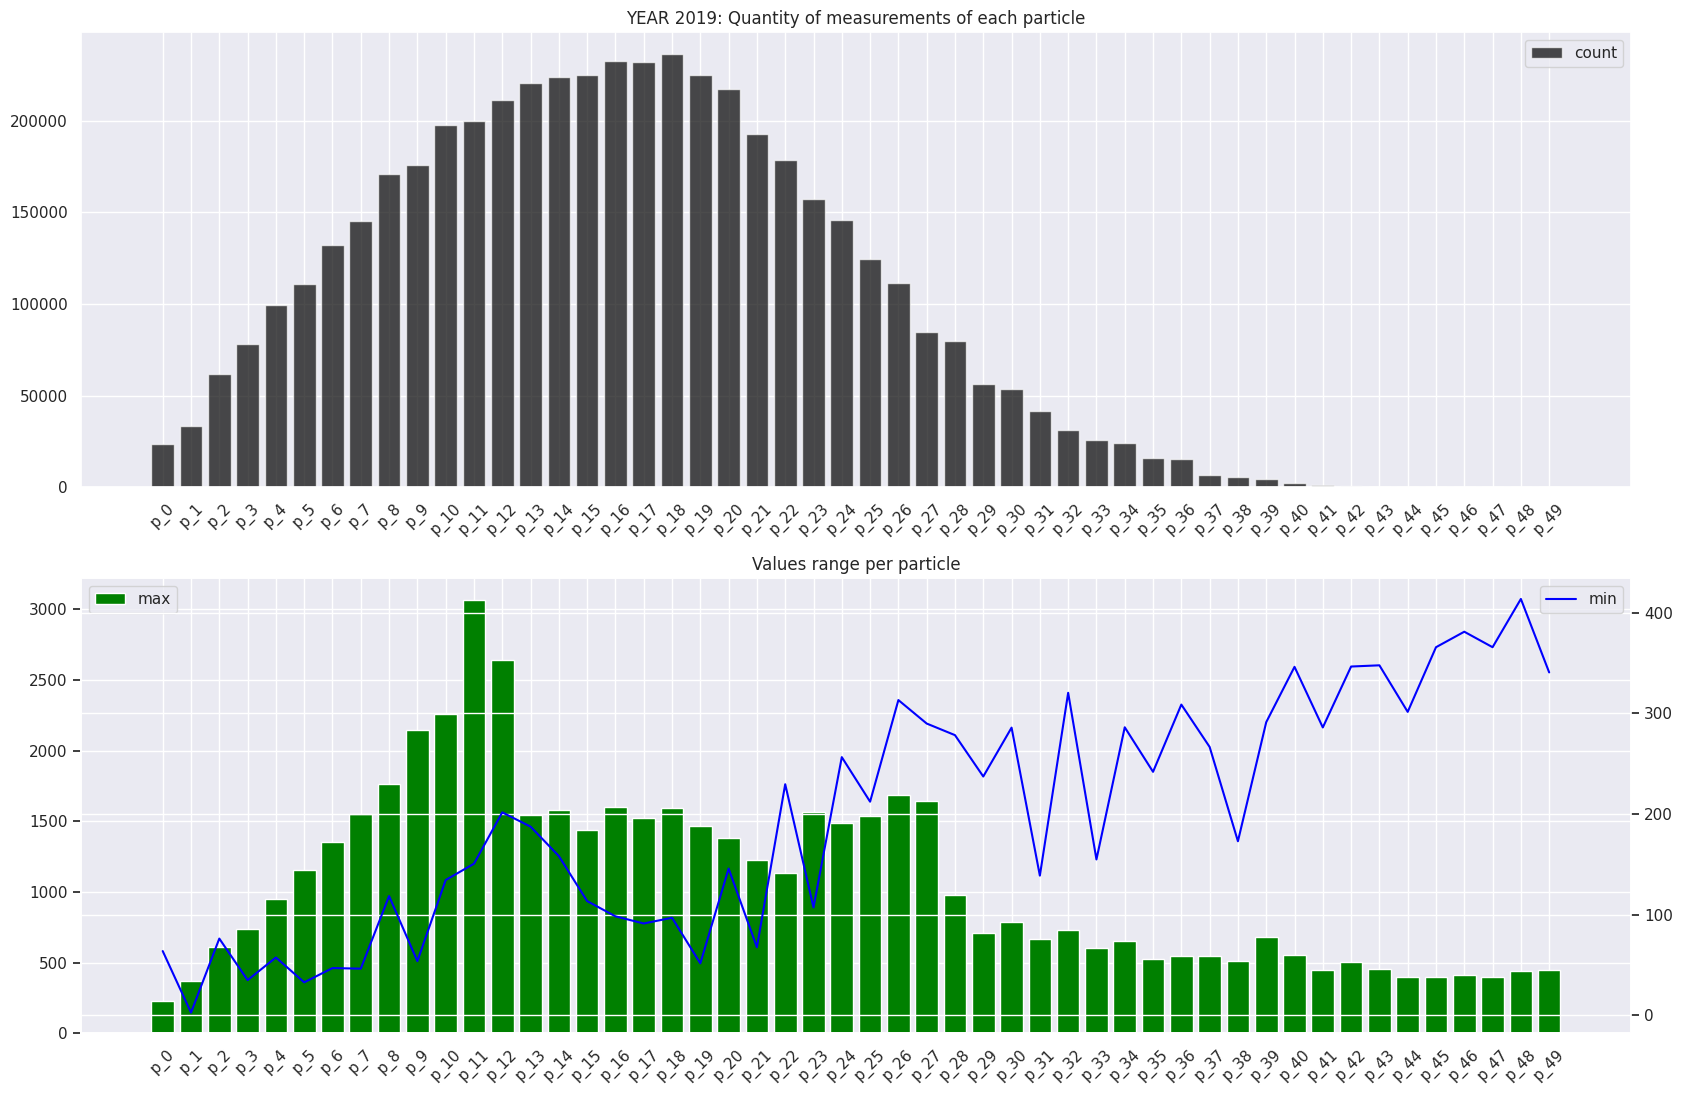

In [19]:
df19 = pd.read_csv(dsc_fc_2019)
prtcles19 = [f'p_{x}' for x in range(0,50)]
vctr19 = ['vec_1', 'vec_2', 'vec_3']
df19.columns = ['Timestamp'] + vctr19 + prtcles19
df19['Timestamp'] = pd.to_datetime(df19['Timestamp'])
df19.replace(0, np.nan, inplace=True)
inf19 = df19.describe()
inf19 = inf19.T.reset_index()
inf19.rename(columns={'index': 'prtcls'}, inplace=True)
inf19_p = inf19.iloc[3:]

gridsize = (2, 1)
fig = plt.figure(figsize=(20, 13))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=1)

ax1.bar(inf19_p['prtcls'], inf19_p['count'], color = 'black', alpha=.7, label = 'count')
ax1.set_title('YEAR 2019: Quantity of measurements of each particle')
ax1.legend(loc = 'upper right')
ax2.bar(inf19_p['prtcls'], inf19_p['max'], color = 'green', label = 'max')
ax21 = ax2.twinx()
ax21.plot(inf19_p['prtcls'], inf19_p['min'], color = 'blue', label = 'min')
ax2.set_title('Values range per particle')
ax2.legend(loc = 'upper left')
ax21.legend(loc = 'upper right')

ax1.xaxis.set_tick_params(rotation=45)
ax2.xaxis.set_tick_params(rotation=45)
plt.show()

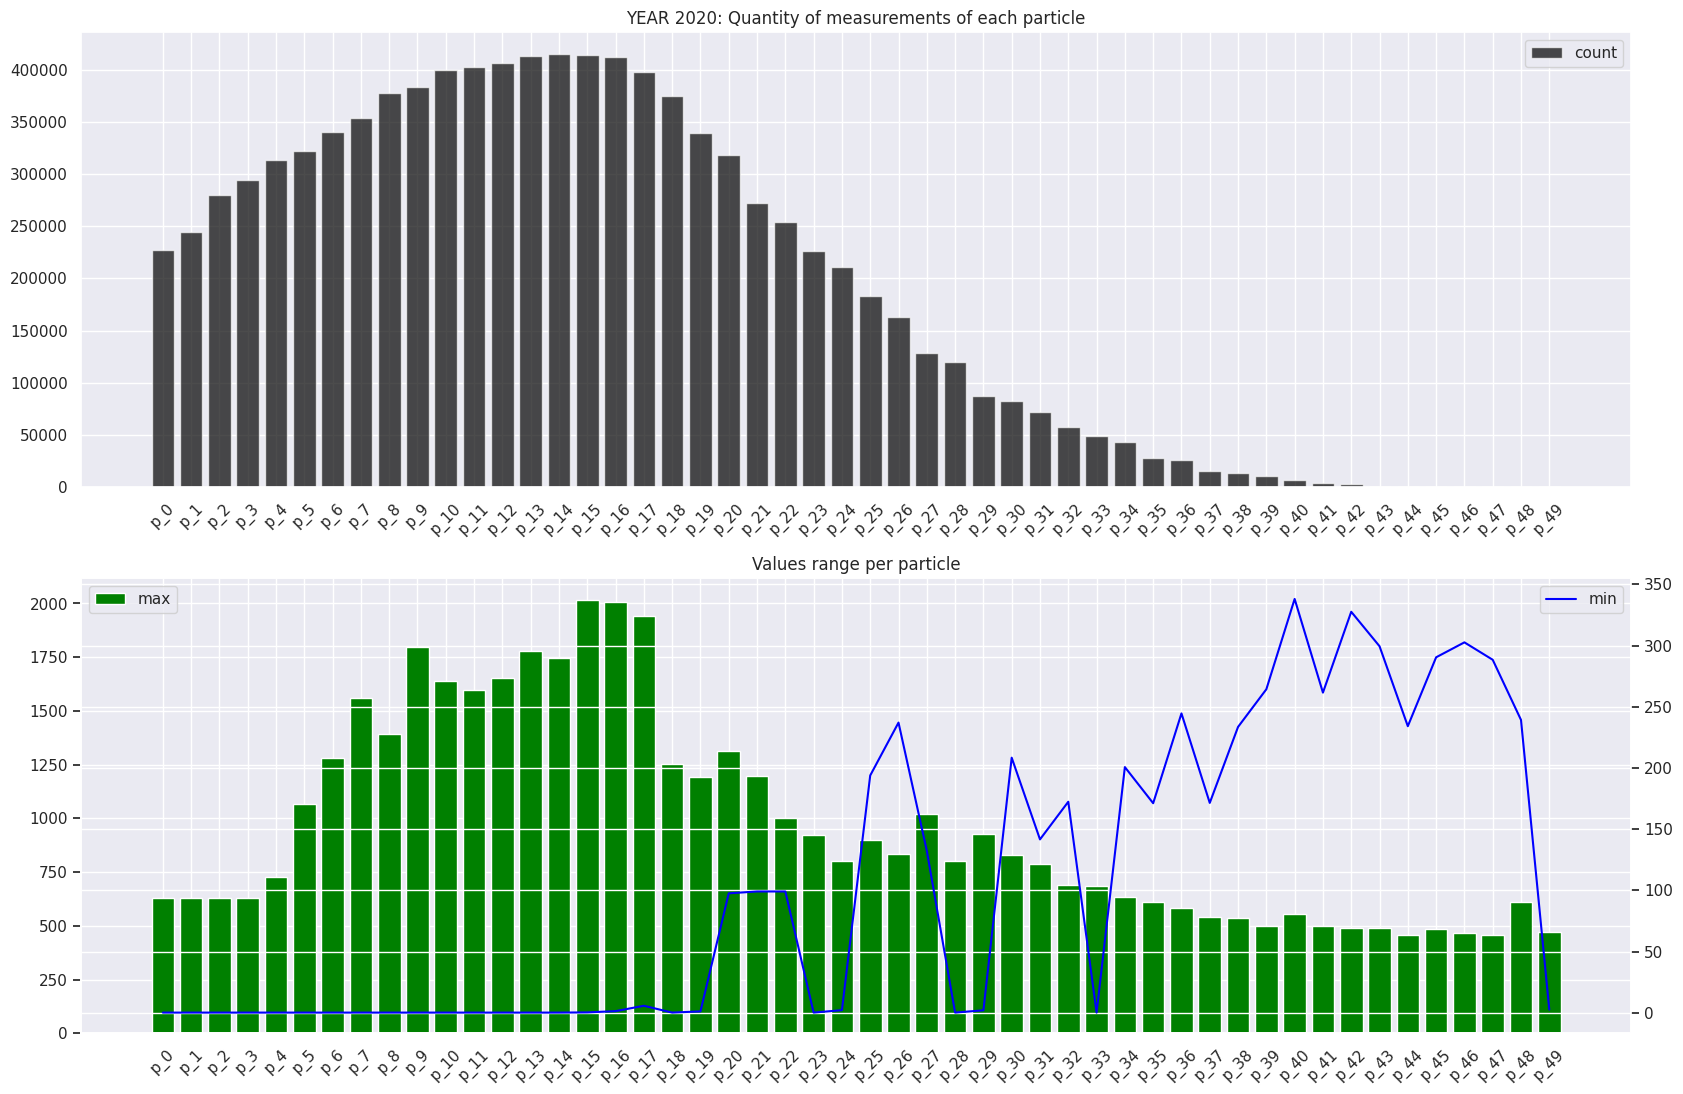

In [20]:
df20 = pd.read_csv(dsc_fc_2020)
prtcles20 = [f'p_{x}' for x in range(0,50)]
vctr20 = ['vec_1', 'vec_2', 'vec_3']
df20.columns = ['Timestamp'] + vctr20 + prtcles20
df20['Timestamp'] = pd.to_datetime(df20['Timestamp'])
df20.replace(0, np.nan, inplace=True)
inf20 = df20.describe()
inf20 = inf20.T.reset_index()
inf20.rename(columns={'index': 'prtcls'}, inplace=True)
inf20_p = inf20.iloc[3:]

gridsize = (2, 1)
fig = plt.figure(figsize=(20, 13))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=1)

ax1.bar(inf20_p['prtcls'], inf20_p['count'], color = 'black', alpha=.7, label = 'count')
ax1.set_title('YEAR 2020: Quantity of measurements of each particle')
ax1.legend(loc = 'upper right')
ax2.bar(inf20_p['prtcls'], inf20_p['max'], color = 'green', label = 'max')
ax21 = ax2.twinx()
ax21.plot(inf20_p['prtcls'], inf20_p['min'], color = 'blue', label = 'min')
ax2.set_title('Values range per particle')
ax2.legend(loc = 'upper left')
ax21.legend(loc = 'upper right')

ax1.xaxis.set_tick_params(rotation=45)
ax2.xaxis.set_tick_params(rotation=45)
plt.show()

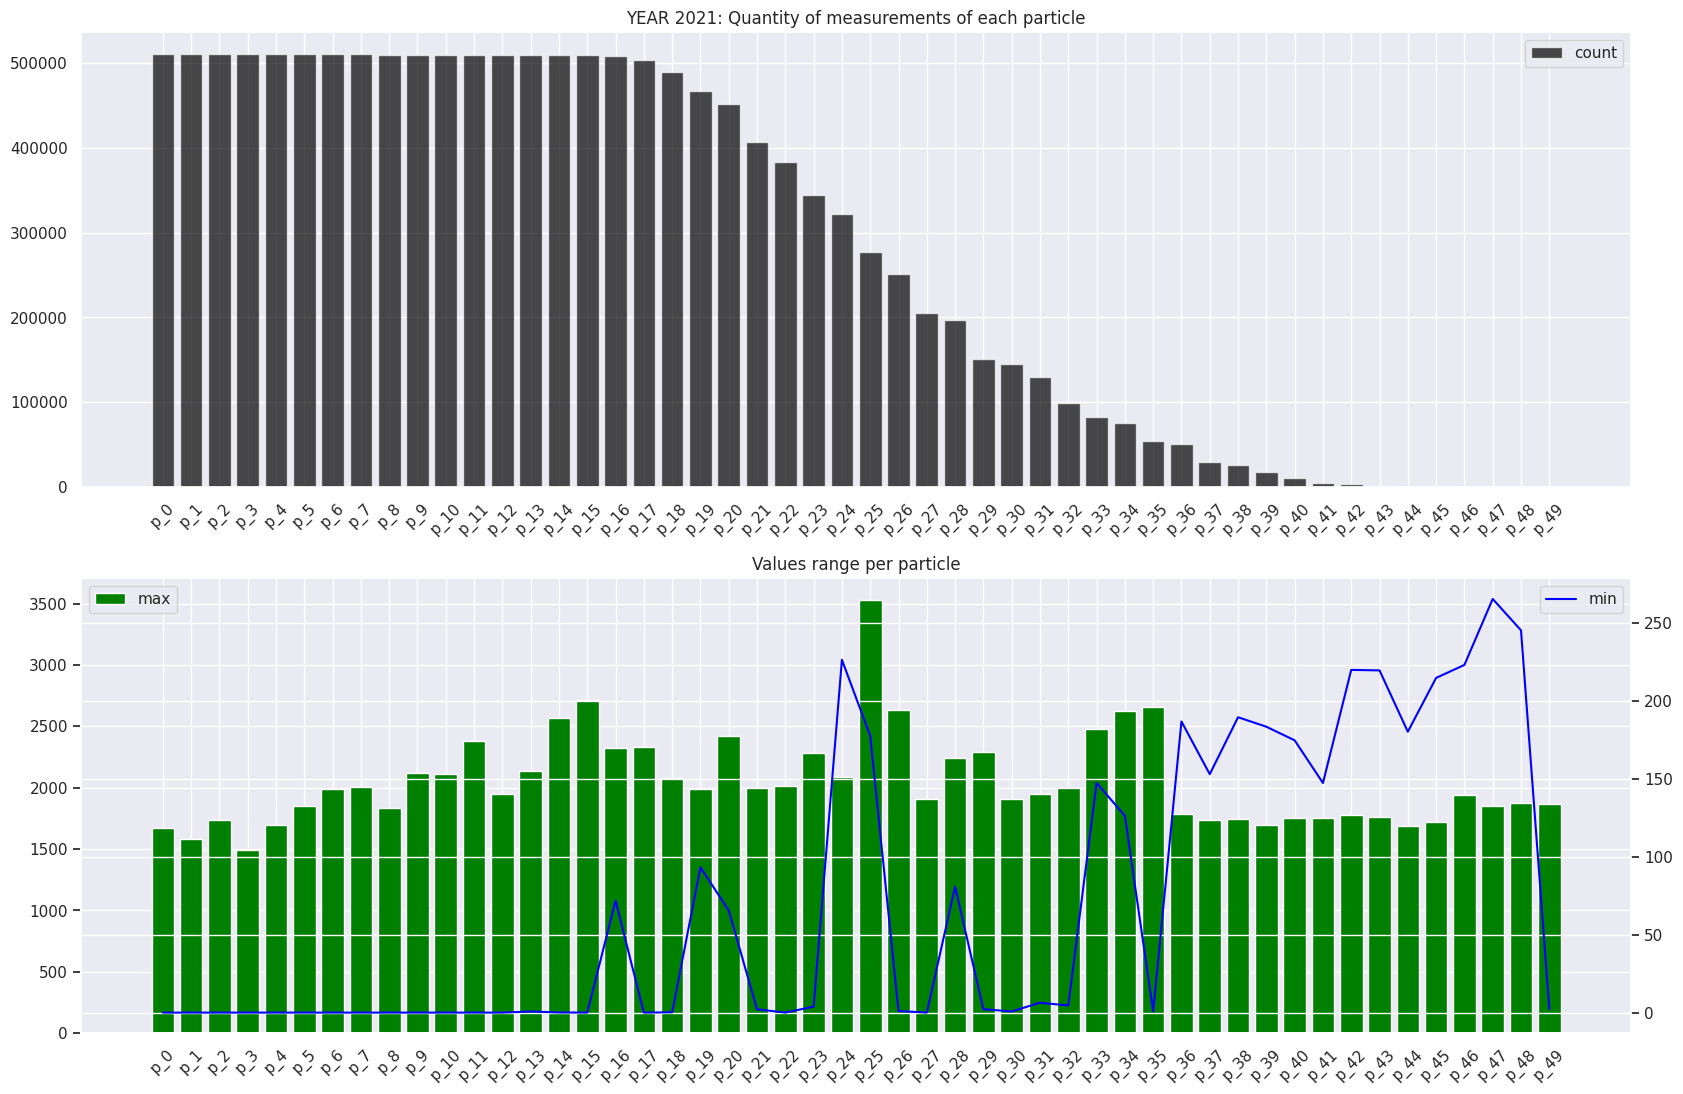

In [21]:
df21 = pd.read_csv(dsc_fc_2021)
prtcles21 = [f'p_{x}' for x in range(0,50)]
vctr21 = ['vec_1', 'vec_2', 'vec_3']
df21.columns = ['Timestamp'] + vctr21 + prtcles21
df21['Timestamp'] = pd.to_datetime(df21['Timestamp'])
df21.replace(0, np.nan, inplace=True)
inf21 = df21.describe()
inf21 = inf21.T.reset_index()
inf21.rename(columns={'index': 'prtcls'}, inplace=True)
inf21_p = inf21.iloc[3:]

gridsize = (2, 1)
fig = plt.figure(figsize=(20, 13))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=1)

ax1.bar(inf21_p['prtcls'], inf21_p['count'], color = 'black', alpha=.7, label = 'count')
ax1.set_title('YEAR 2021: Quantity of measurements of each particle')
ax1.legend(loc = 'upper right')
ax2.bar(inf21_p['prtcls'], inf21_p['max'], color = 'green', label = 'max')
ax21 = ax2.twinx()
ax21.plot(inf21_p['prtcls'], inf21_p['min'], color = 'blue', label = 'min')
ax2.set_title('Values range per particle')
ax2.legend(loc = 'upper left')
ax21.legend(loc = 'upper right')

ax1.xaxis.set_tick_params(rotation=45)
ax2.xaxis.set_tick_params(rotation=45)
plt.show()

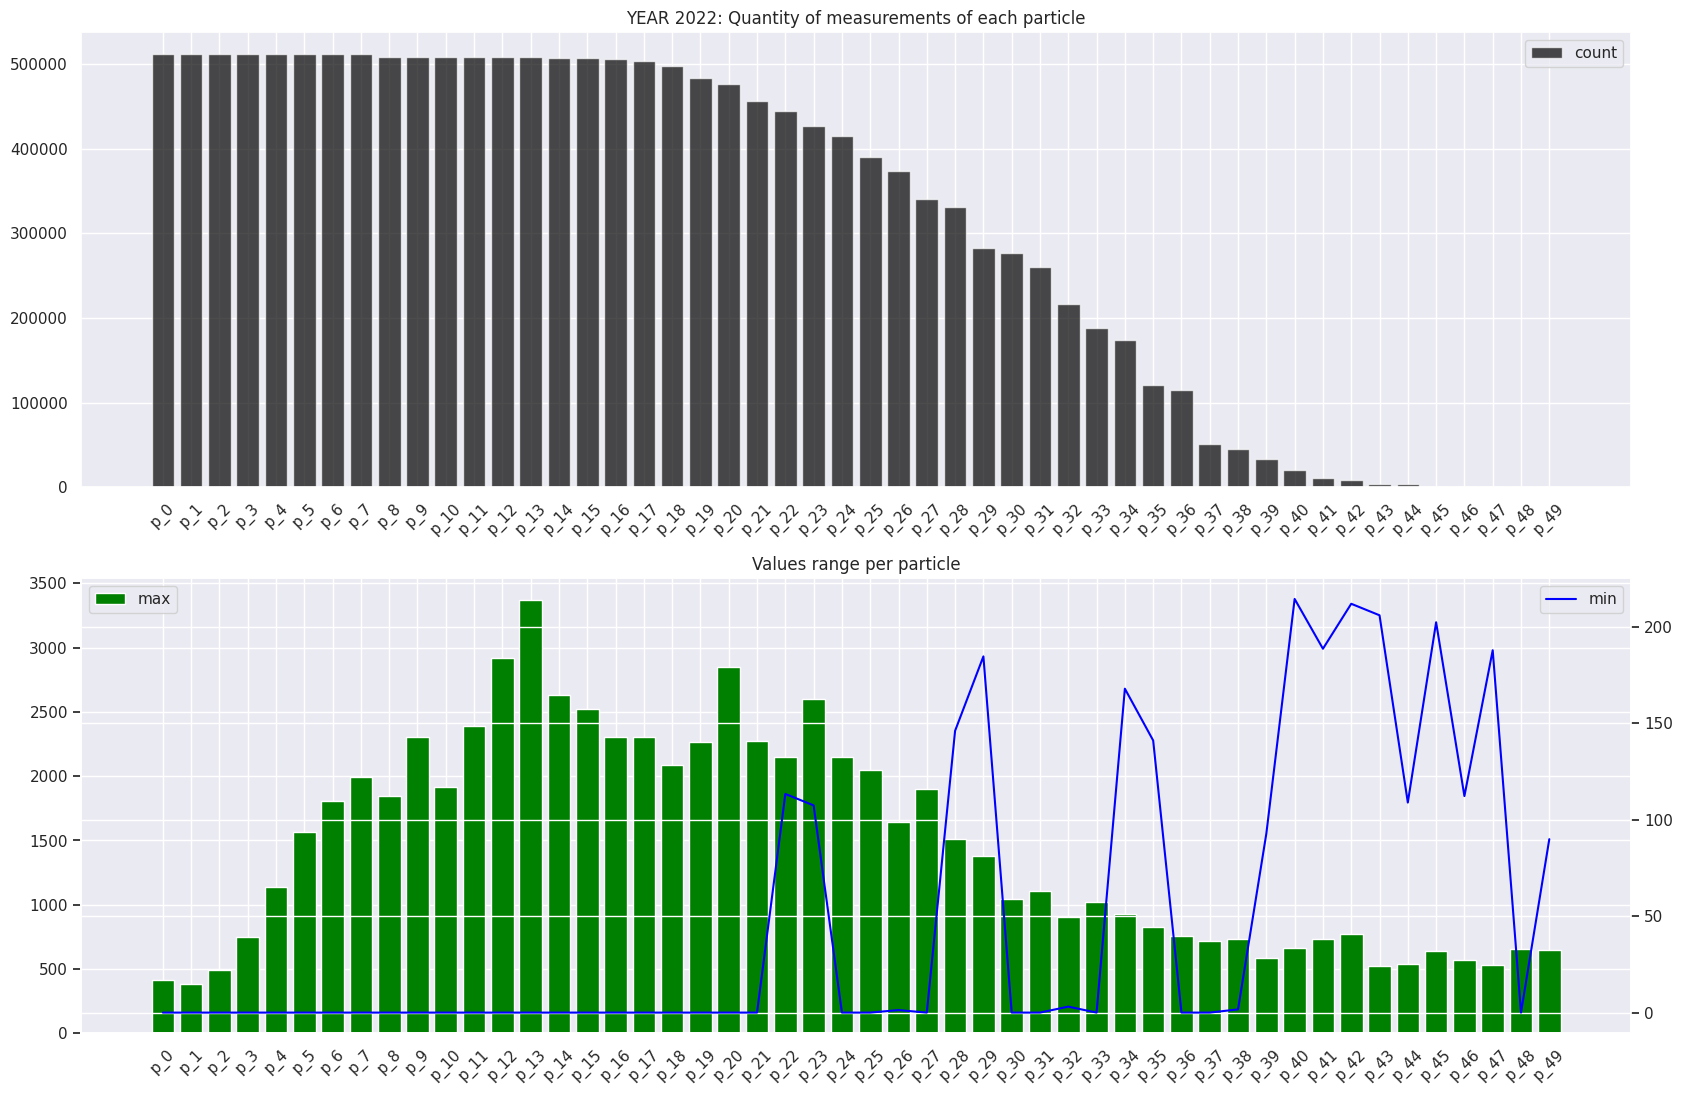

In [22]:
df22 = pd.read_csv(dsc_fc_2022)
prtcles22 = [f'p_{x}' for x in range(0,50)]
vctr22 = ['vec_1', 'vec_2', 'vec_3']
df22.columns = ['Timestamp'] + vctr22 + prtcles22
df22['Timestamp'] = pd.to_datetime(df22['Timestamp'])
df22.replace(0, np.nan, inplace=True)
inf22 = df22.describe()
inf22 = inf22.T.reset_index()
inf22.rename(columns={'index': 'prtcls'}, inplace=True)
inf22_p = inf22.iloc[3:]

gridsize = (2, 1)
fig = plt.figure(figsize=(20, 13))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=1)

ax1.bar(inf22_p['prtcls'], inf22_p['count'], color = 'black', alpha=.7, label = 'count')
ax1.set_title('YEAR 2022: Quantity of measurements of each particle')
ax1.legend(loc = 'upper right')
ax2.bar(inf22_p['prtcls'], inf22_p['max'], color = 'green', label = 'max')
ax21 = ax2.twinx()
ax21.plot(inf21_p['prtcls'], inf22_p['min'], color = 'blue', label = 'min')
ax2.set_title('Values range per particle')
ax2.legend(loc = 'upper left')
ax21.legend(loc = 'upper right')

ax1.xaxis.set_tick_params(rotation=45)
ax2.xaxis.set_tick_params(rotation=45)
plt.show()

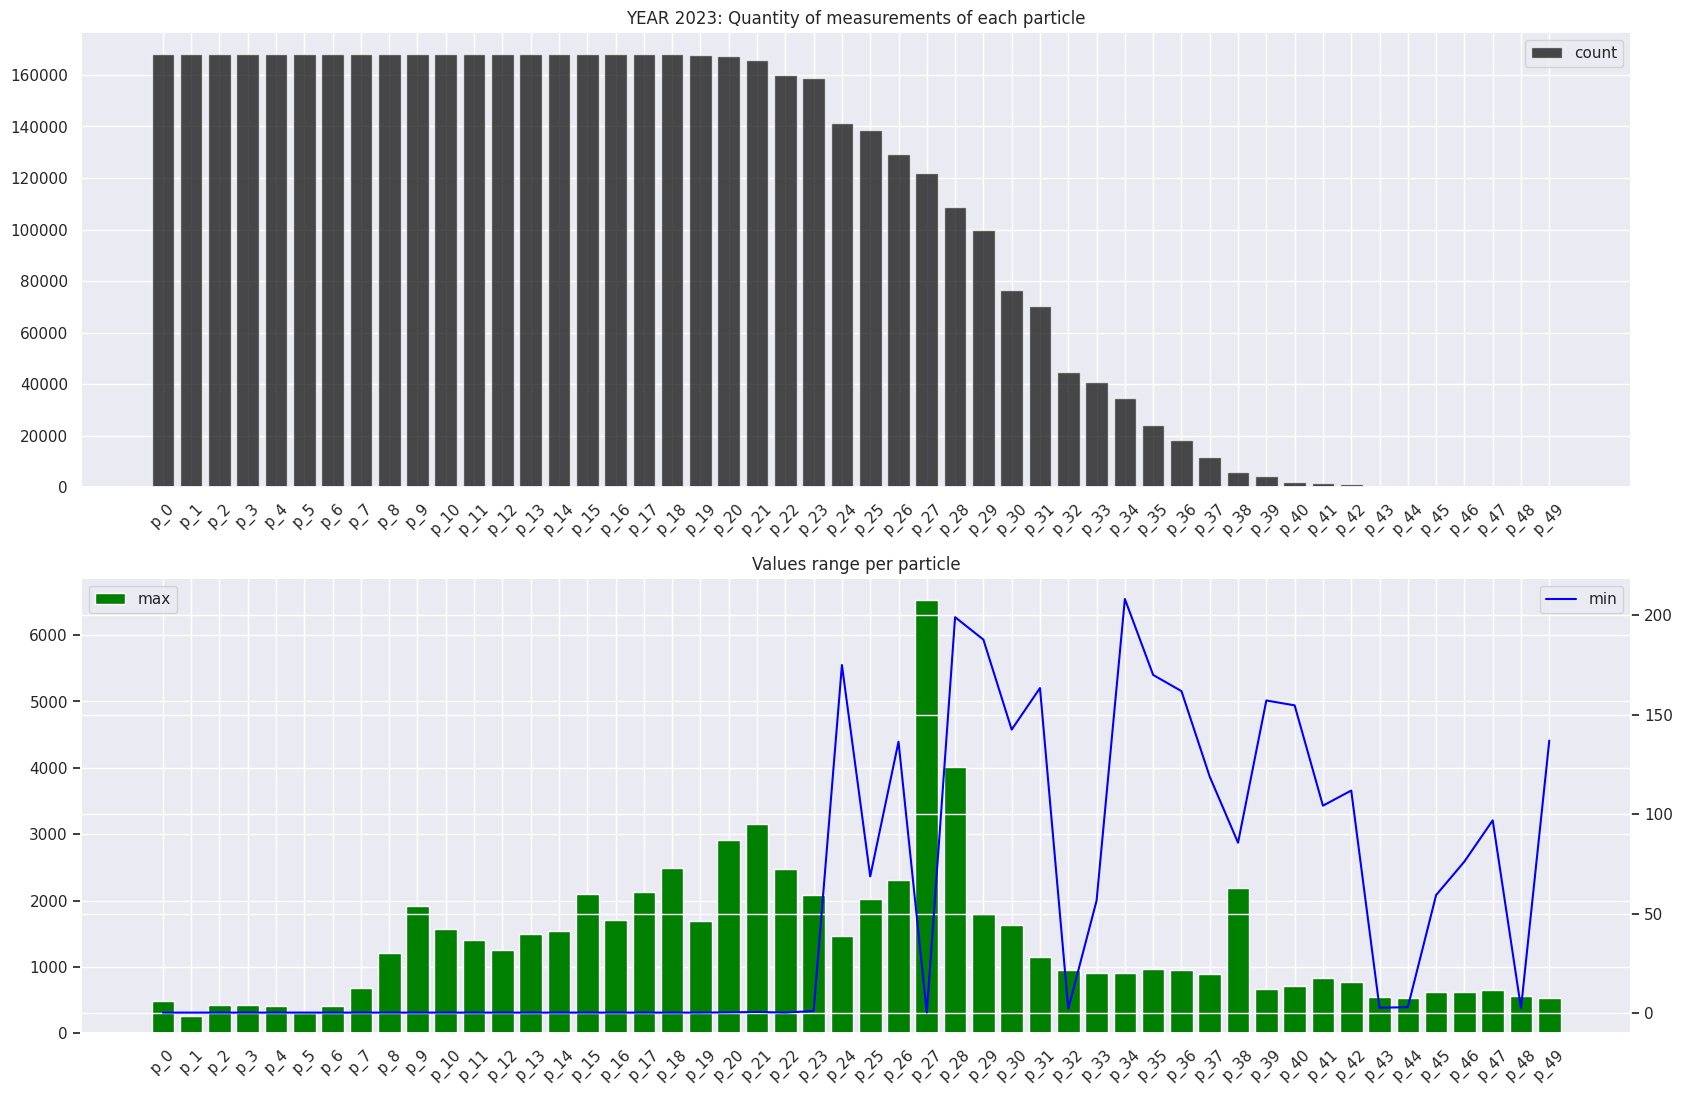

In [23]:
df23 = pd.read_csv(dsc_fc_2023)
prtcles23 = [f'p_{x}' for x in range(0,50)]
vctr23 = ['vec_1', 'vec_2', 'vec_3']
df23.columns = ['Timestamp'] + vctr23 + prtcles23
df23['Timestamp'] = pd.to_datetime(df23['Timestamp'])
df23.replace(0, np.nan, inplace=True)
inf23 = df23.describe()
inf23 = inf23.T.reset_index()
inf23.rename(columns={'index': 'prtcls'}, inplace=True)
inf23_p = inf23.iloc[3:]

gridsize = (2, 1)
fig = plt.figure(figsize=(20, 13))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=1)

ax1.bar(inf23_p['prtcls'], inf23_p['count'], color = 'black', alpha=.7, label = 'count')
ax1.set_title('YEAR 2023: Quantity of measurements of each particle')
ax1.legend(loc = 'upper right')
ax2.bar(inf23_p['prtcls'], inf23_p['max'], color = 'green', label = 'max')
ax21 = ax2.twinx()
ax21.plot(inf21_p['prtcls'], inf23_p['min'], color = 'blue', label = 'min')
ax2.set_title('Values range per particle')
ax2.legend(loc = 'upper left')
ax21.legend(loc = 'upper right')

ax1.xaxis.set_tick_params(rotation=45)
ax2.xaxis.set_tick_params(rotation=45)
plt.show()

In [24]:
inf17_p.rename(columns={'count': 'count_all'}, inplace=True)
df17_p20 = df17[df17['p_20'].notnull()]
inf17_p20 = df17_p20.describe()
inf17_p20 = inf17_p20.T.reset_index()
inf17_p20.rename(columns={'index': 'prtcls'}, inplace=True)

inf17_p20 = inf17_p20.iloc[3:]
inf17_p20 = inf17_p20.rename(columns={'count': 'count_p20'})

inf17_p20
inf17_count = inf17_p[['prtcls', 'count_all']]
inf17_count = inf17_count.merge(inf17_p20[['prtcls', 'count_p20']], on='prtcls', how='left')
inf17_count.head()


<ipython-input-24-40f8707f07a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inf17_p.rename(columns={'count': 'count_all'}, inplace=True)


,prtcls,count_all,count_p20
0,p_0,21227.0,235.0
1,p_1,34889.0,4050.0
2,p_2,54529.0,23690.0
3,p_3,77869.0,47029.0
4,p_4,103292.0,72452.0


In [25]:
df17_notp20 = df17[df17['p_20'].isnull()]
inf17_notp20 = df17_notp20.describe()
inf17_notp20 = inf17_notp20.T.reset_index()
inf17_notp20.rename(columns={'index': 'prtcls'}, inplace=True)
inf17_notp20 = inf17_notp20.iloc[3:]
inf17_notp20 = inf17_notp20.rename(columns={'count': 'count_notp20'})
inf17_count = inf17_count.merge(inf17_notp20[['prtcls', 'count_notp20']], on='prtcls', how='left')
inf17_count

,prtcls,count_all,count_p20,count_notp20
0,p_0,21227.0,235.0,20992.0
1,p_1,34889.0,4050.0,30839.0
2,p_2,54529.0,23690.0,30839.0
3,p_3,77869.0,47029.0,30840.0
4,p_4,103292.0,72452.0,30840.0
5,p_5,126193.0,95353.0,30840.0
6,p_6,154014.0,123171.0,30843.0
7,p_7,182378.0,151535.0,30843.0
8,p_8,213968.0,183123.0,30845.0
9,p_9,237368.0,206524.0,30844.0


In [28]:
df17_p = df17.drop(columns=['vec_1', 'vec_2', 'vec_3'])
df17_p


,Timestamp,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,...,p_40,p_41,p_42,p_43,p_44,p_45,p_46,p_47,p_48,p_49
0,2017-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525594,2017-12-31 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267.781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525595,2017-12-31 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267.870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525596,2017-12-31 23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525597,2017-12-31 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262.990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
import datetime as dt
df17_p['Timestamp'] = pd.to_datetime(df17_p['Timestamp'])
start = pd.Timestamp('07.09.2017 14:00')
start_60 = pd.Timestamp('07.09.2017 15:00')
pick1 = pd.Timestamp('07.09.2017 21:00')
pick1_60 = pd.Timestamp('07.09.2017 22:00')
pick2 = pd.Timestamp('08.09.2017 12:00')
pick2_60 = pd.Timestamp('08.09.2017 13:00')
end = pd.Timestamp('09.09.2017 12:00')
end_60 = pd.Timestamp('09.09.2017 13:00')
df_start = df17_p[(df17_p['Timestamp'] > start) & (df17_p['Timestamp'] < start_60)]
df_pick1 = df17_p[(df17_p['Timestamp'] > pick1) & (df17_p['Timestamp'] < pick1_60)]
df_pick2 = df17_p[(df17_p['Timestamp'] > pick2) & (df17_p['Timestamp'] < pick2_60)]
df_end = df17_p[(df17_p['Timestamp'] > end) & (df17_p['Timestamp'] < end_60)]

df_start.set_index('Timestamp', inplace=True)
df_start = df_start.T
df_pick1.set_index('Timestamp', inplace=True)
df_pick1 = df_pick1.T
df_pick2.set_index('Timestamp', inplace=True)
df_pick2 = df_pick2.T
df_end.set_index('Timestamp', inplace=True)
df_end = df_end.T

df_event = df17_p[(df17_p['Timestamp'] > start) & (df17_p['Timestamp'] < end_60)]
df_cmp = df17_p[(df17_p['Timestamp'] > pd.Timestamp('09.10.2017 15:00')) & (df17_p['Timestamp'] < pd.Timestamp('11.12.2017 13:00'))]

df_event.set_index('Timestamp', inplace=True)
df_cmp.set_index('Timestamp', inplace=True)

df_cmp.describe()


,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_40,p_41,p_42,p_43,p_44,p_45,p_46,p_47,p_48,p_49
count,5793.000000,7738.000000,10016.000000,13749.000000,18493.000000,22598.000000,27549.000000,32952.000000,38642.000000,42298.000000,...,13714.000000,10971.000000,9021.000000,5268.000000,4333.000000,858.000000,564.000000,196.000000,164.000000,148.000000
mean,197.180915,87.786533,225.423762,233.957982,273.111586,262.372009,284.218071,273.265189,359.857163,316.752456,...,420.857566,365.265778,411.872613,405.982835,373.863003,403.399852,407.718488,392.033816,444.460909,400.713324
std,10.954719,20.086202,40.713880,84.459796,132.512668,165.435446,142.237909,165.295032,141.022293,186.111700,...,24.034334,28.647534,30.062694,35.316906,36.865966,42.543197,43.229171,47.801918,50.450049,50.885555
min,119.344000,50.522200,156.751000,53.361500,51.034700,0.231726,0.231726,0.231726,48.810000,69.852800,...,207.131000,139.445000,274.332000,266.372000,165.782000,234.134000,158.607000,280.776000,290.340000,296.584000
25%,189.556000,71.546400,198.332250,182.877000,200.414000,171.457000,198.599000,177.774750,278.063000,209.388750,...,408.564750,351.547500,400.355000,397.307750,362.025000,388.166500,393.183000,370.320250,420.003250,376.191000
50%,195.447000,86.581500,218.543500,204.342000,222.080000,197.714500,225.515000,206.672000,306.118000,249.791500,...,424.883000,368.178000,417.929000,413.565500,382.217000,405.547500,406.947500,384.316500,434.277000,390.066000
75%,203.561000,98.405800,231.738250,224.305000,244.191000,241.691750,309.138000,286.256000,372.816750,360.847000,...,434.838750,381.047500,427.981000,421.024750,392.436000,417.451250,423.972500,404.801250,451.297500,407.834000
max,253.117000,220.571000,444.677000,630.998000,895.333000,1006.950000,1035.540000,1270.340000,1333.070000,2113.610000,...,649.916000,620.130000,662.190000,708.023000,696.414000,786.534000,630.474000,653.786000,668.663000,677.952000


In [125]:

df_ev = df_event
df_cp = df_cmp

df_event = df_event.T
df_cmp = df_cmp.T

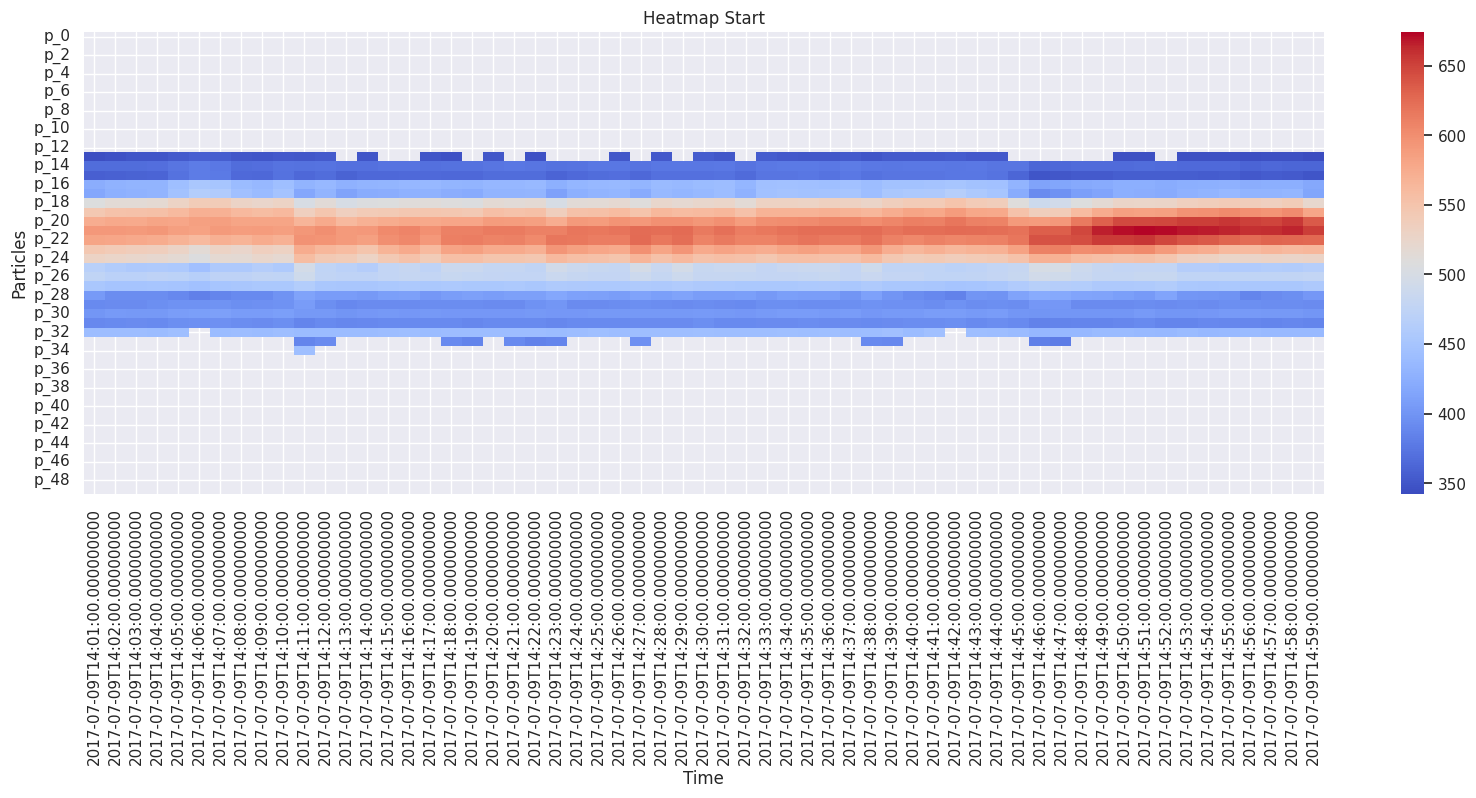

In [104]:
plt.figure(figsize=(20, 6))
sns.heatmap(df_start, cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Particles')
plt.title('Heatmap Start')
plt.show()

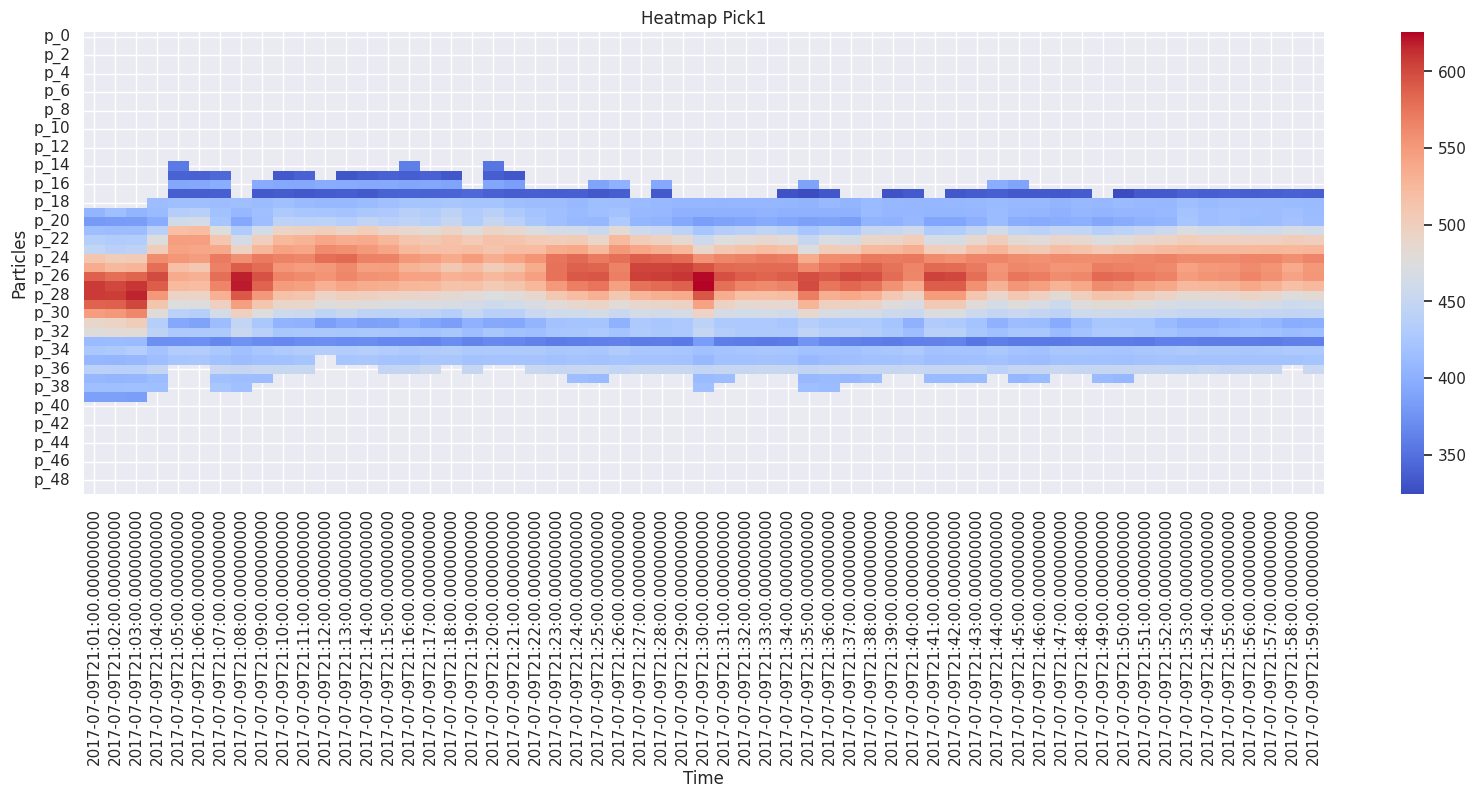

In [105]:
plt.figure(figsize=(20, 6))
sns.heatmap(df_pick1, cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Particles')
plt.title('Heatmap Pick1')
plt.show()

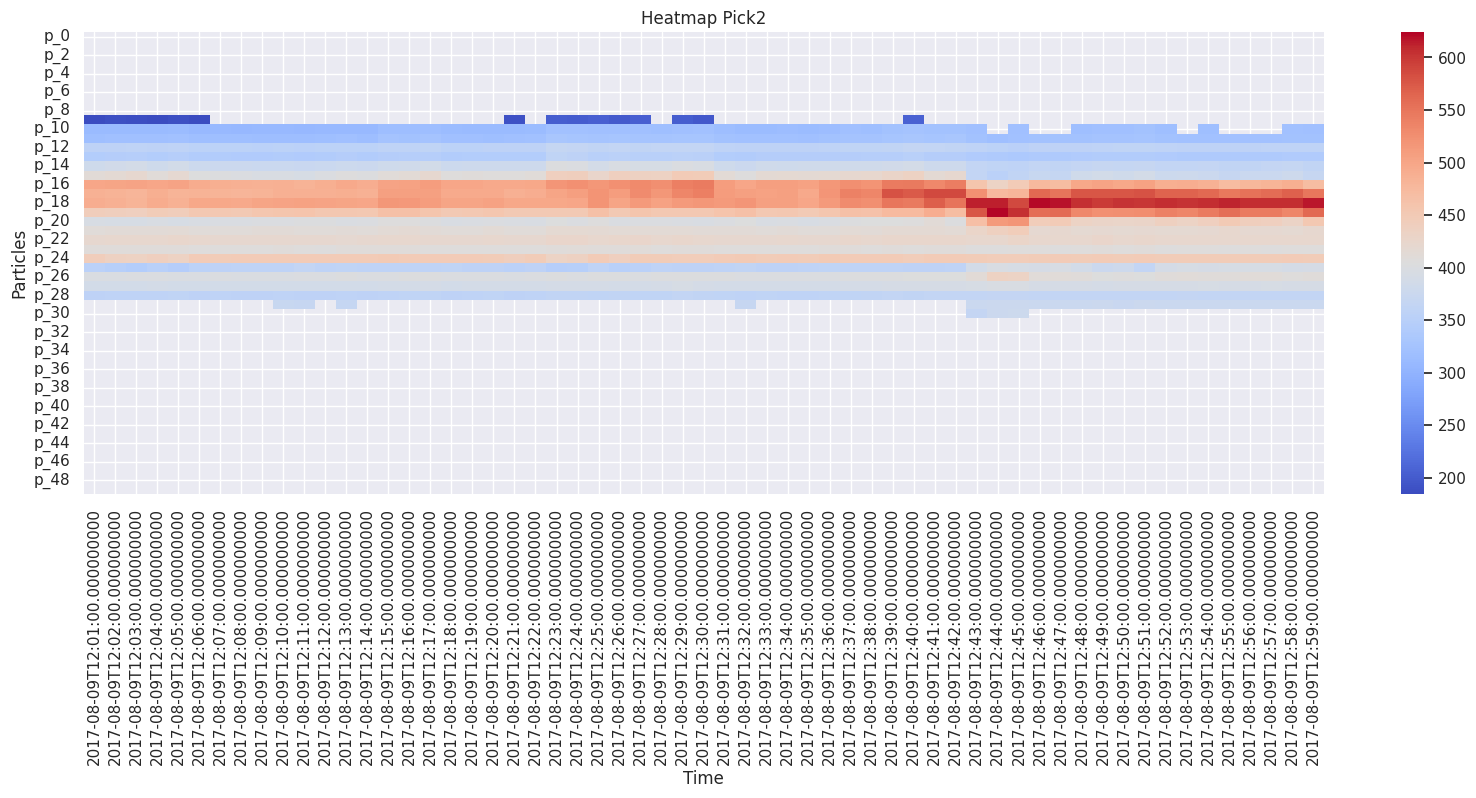

In [106]:
plt.figure(figsize=(20, 6))
sns.heatmap(df_pick2, cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Particles')
plt.title('Heatmap Pick2')
plt.show()

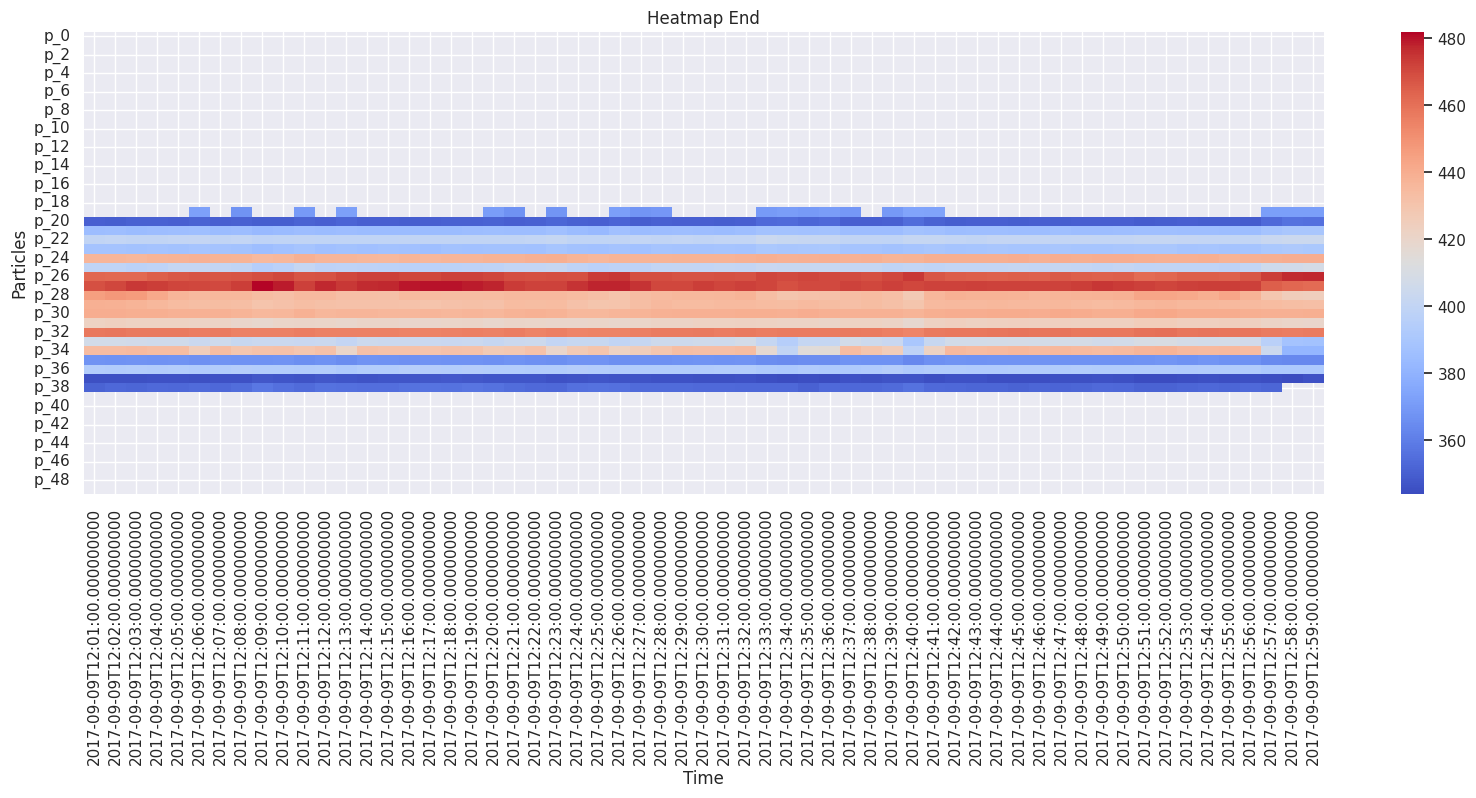

In [107]:
plt.figure(figsize=(20, 6))
sns.heatmap(df_end, cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Particles')
plt.title('Heatmap End')
plt.show()

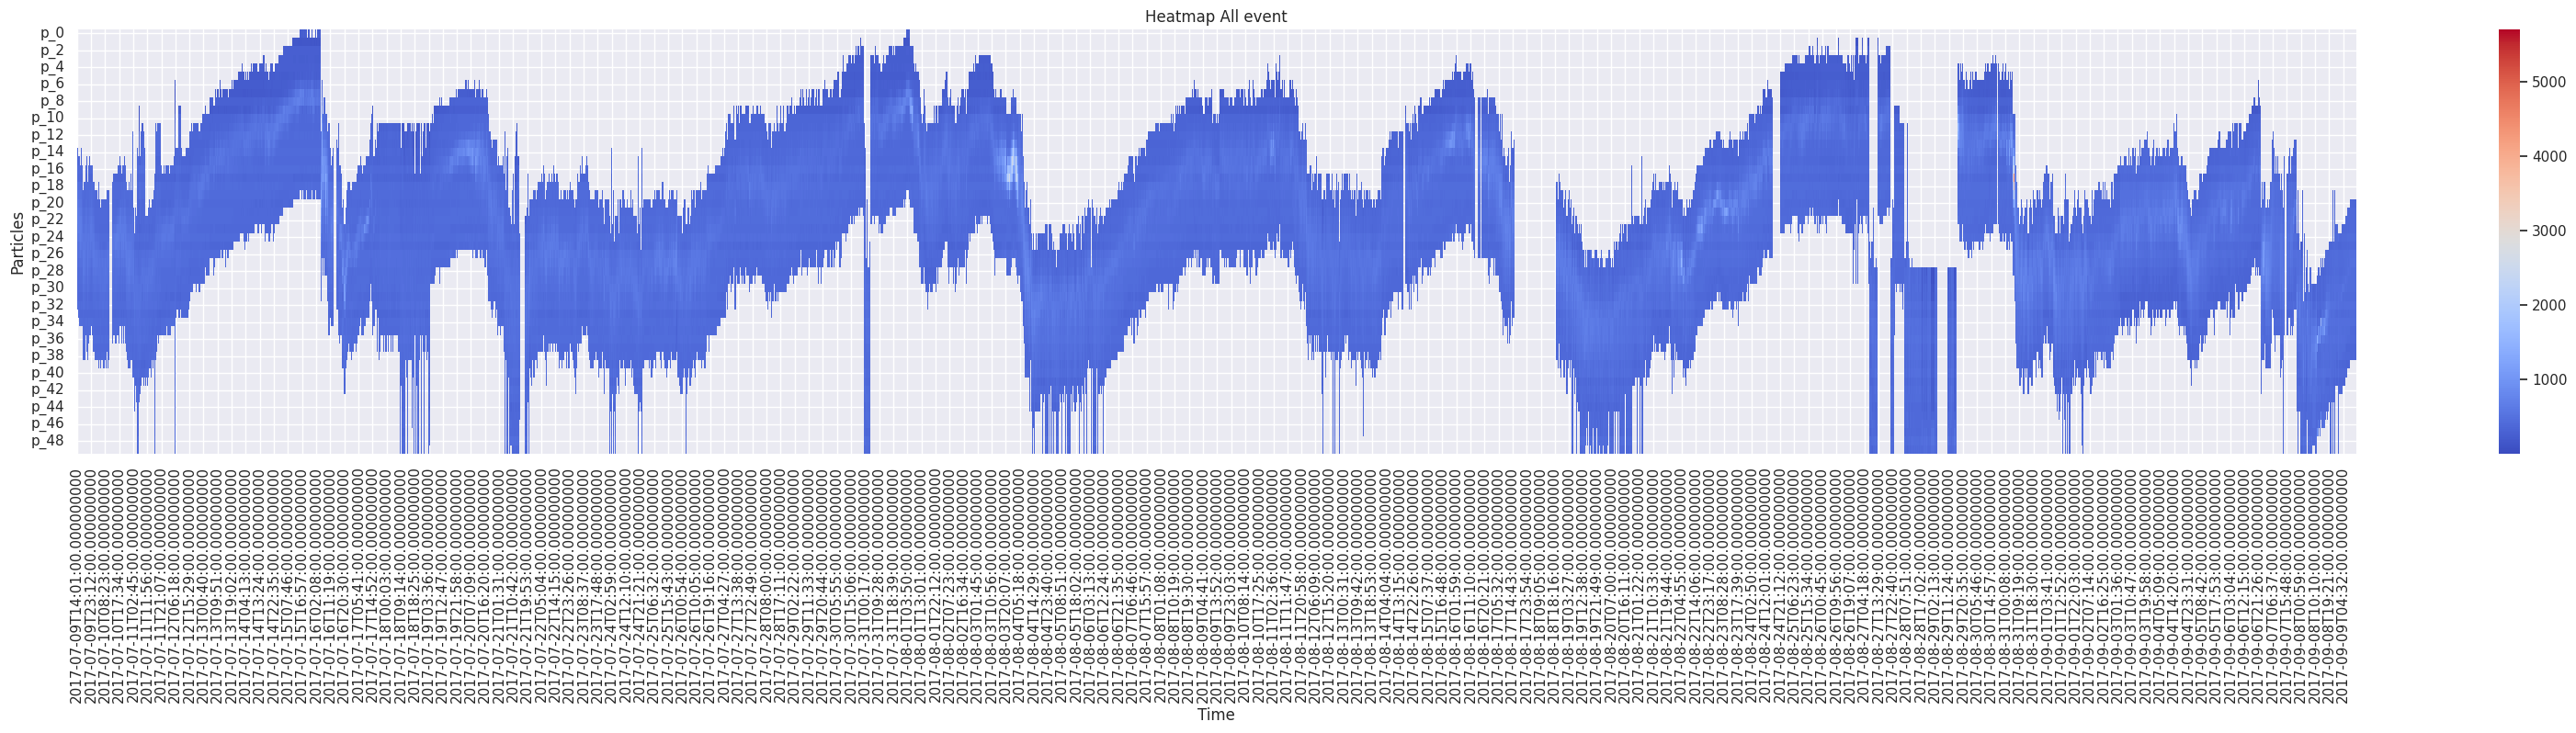

In [108]:
plt.figure(figsize=(40, 6))
sns.heatmap(df_event, cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Particles')
plt.title('Heatmap All event')
plt.show()

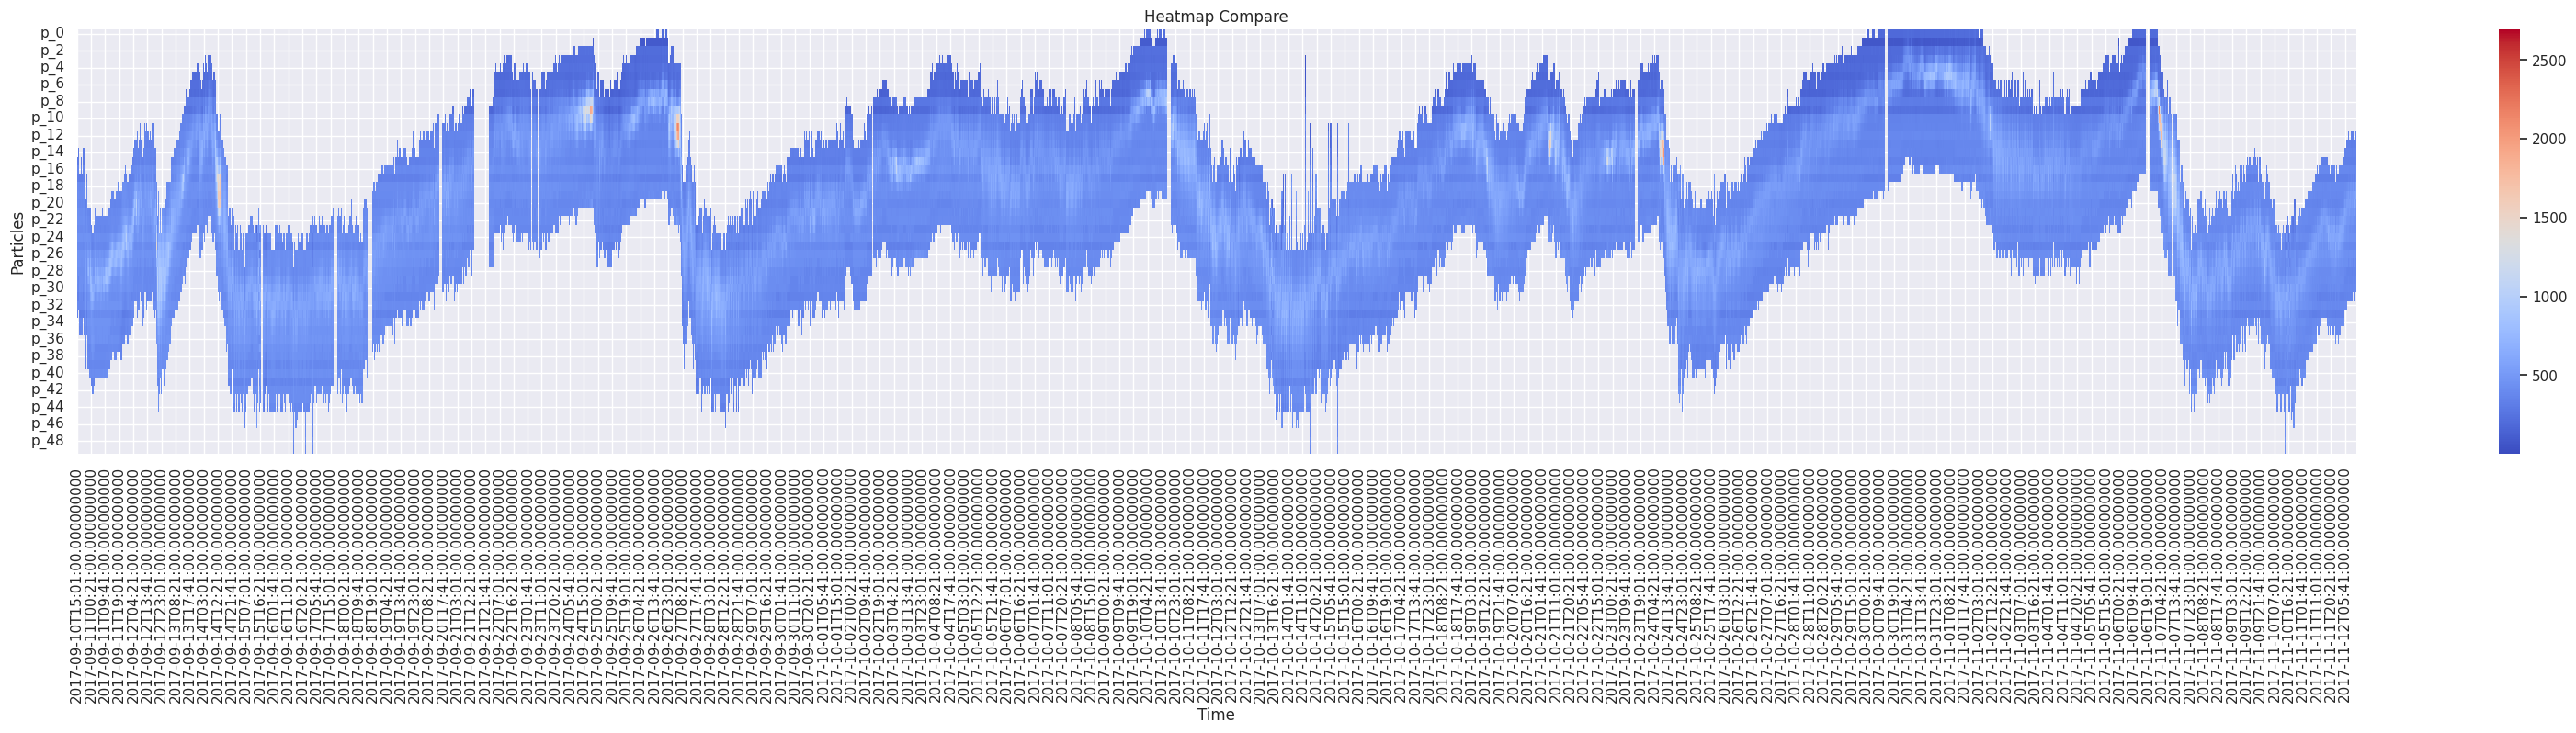

In [109]:
plt.figure(figsize=(40, 6))
sns.heatmap(df_cmp, cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Particles')
plt.title('Heatmap Compare')
plt.show()

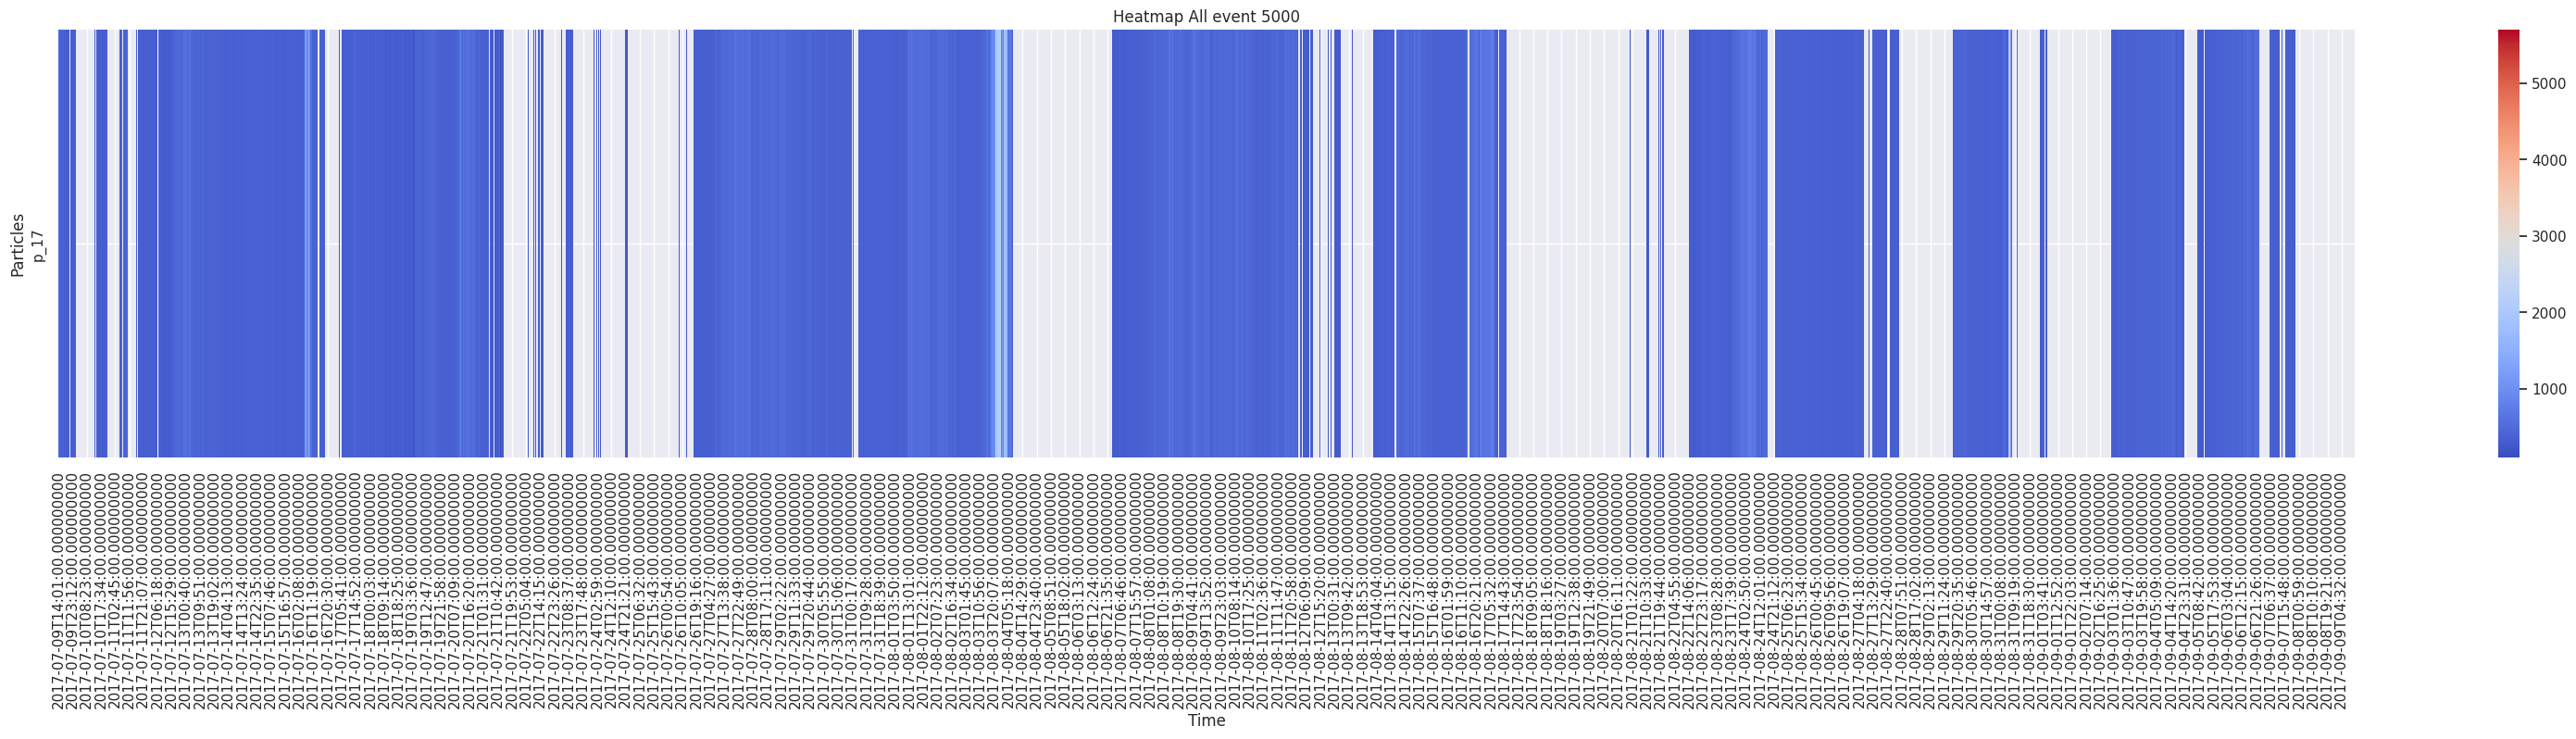

In [117]:
df_event_5000 = df_event[df_event.gt(5000).any(axis=1)]

plt.figure(figsize=(40, 6))
sns.heatmap(df_event_5000, cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Particles')
plt.title('Heatmap All event 5000')
plt.show()

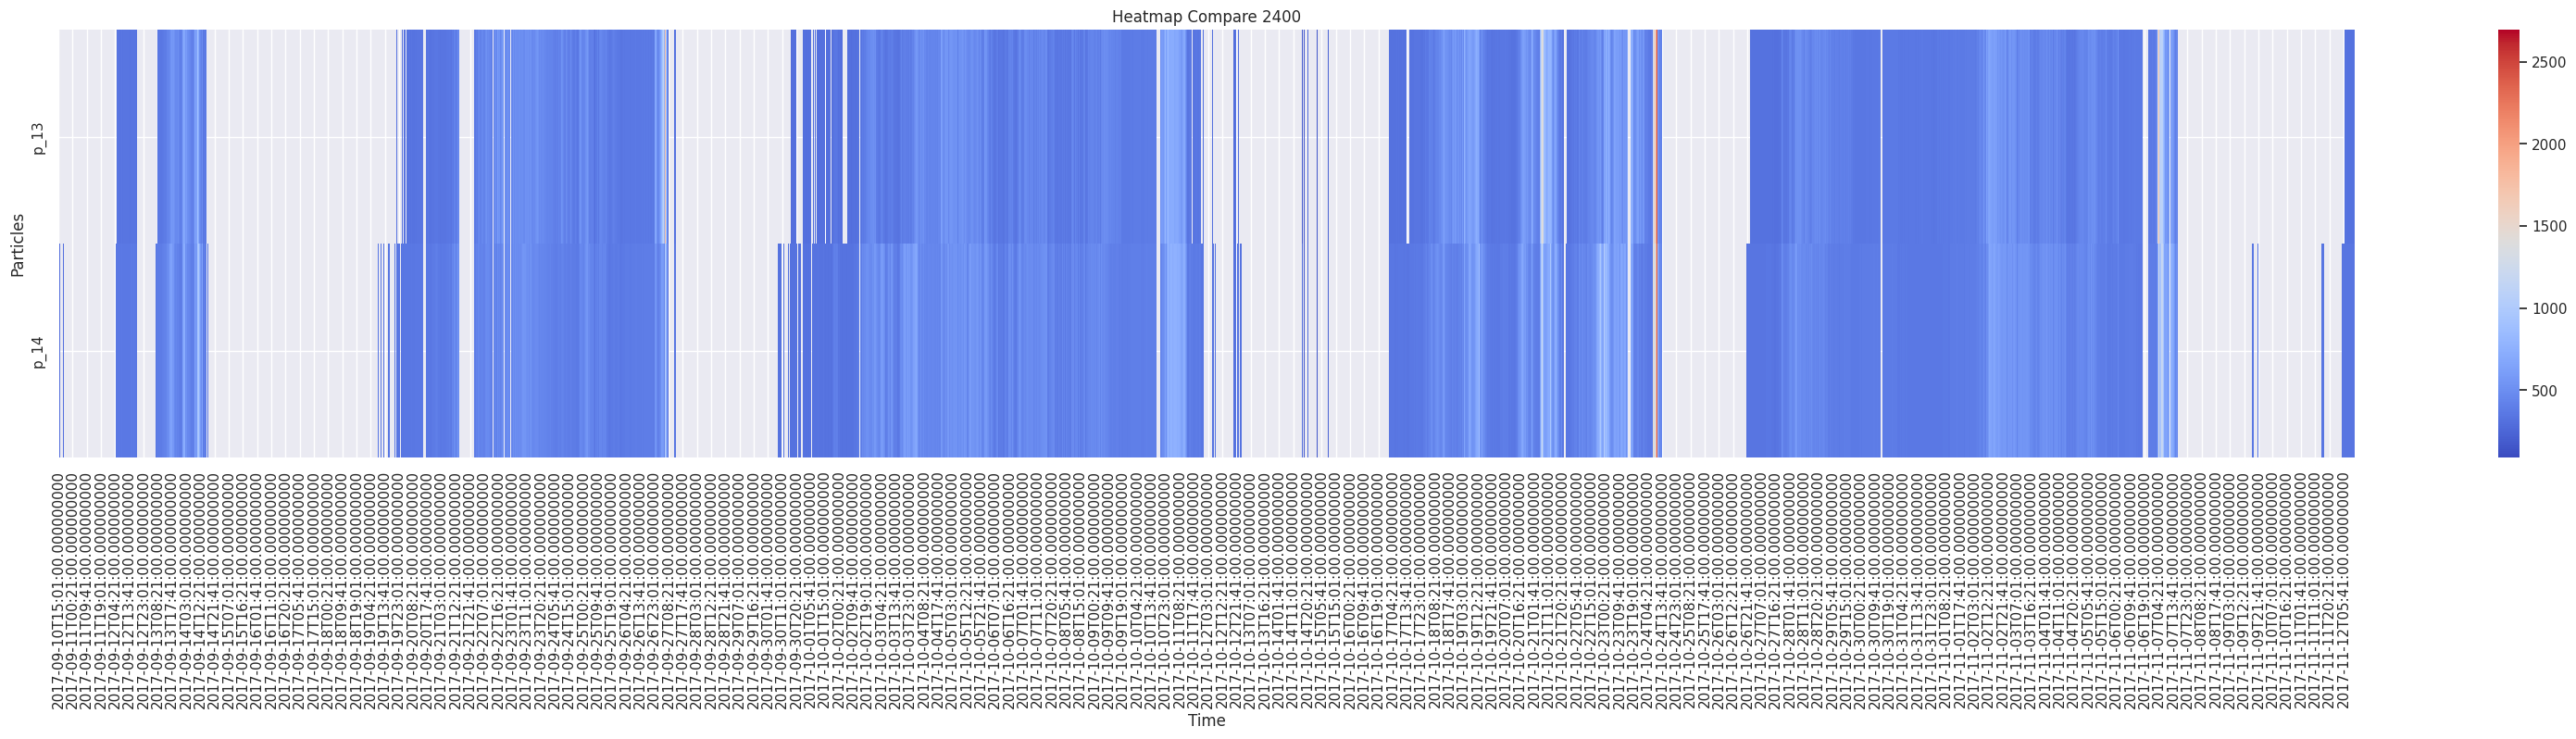

In [118]:
df_cmp_2400 = df_cmp[df_cmp.gt(2400).any(axis=1)]

plt.figure(figsize=(40, 6))
sns.heatmap(df_cmp_2400, cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Particles')
plt.title('Heatmap Compare 2400')
plt.show()

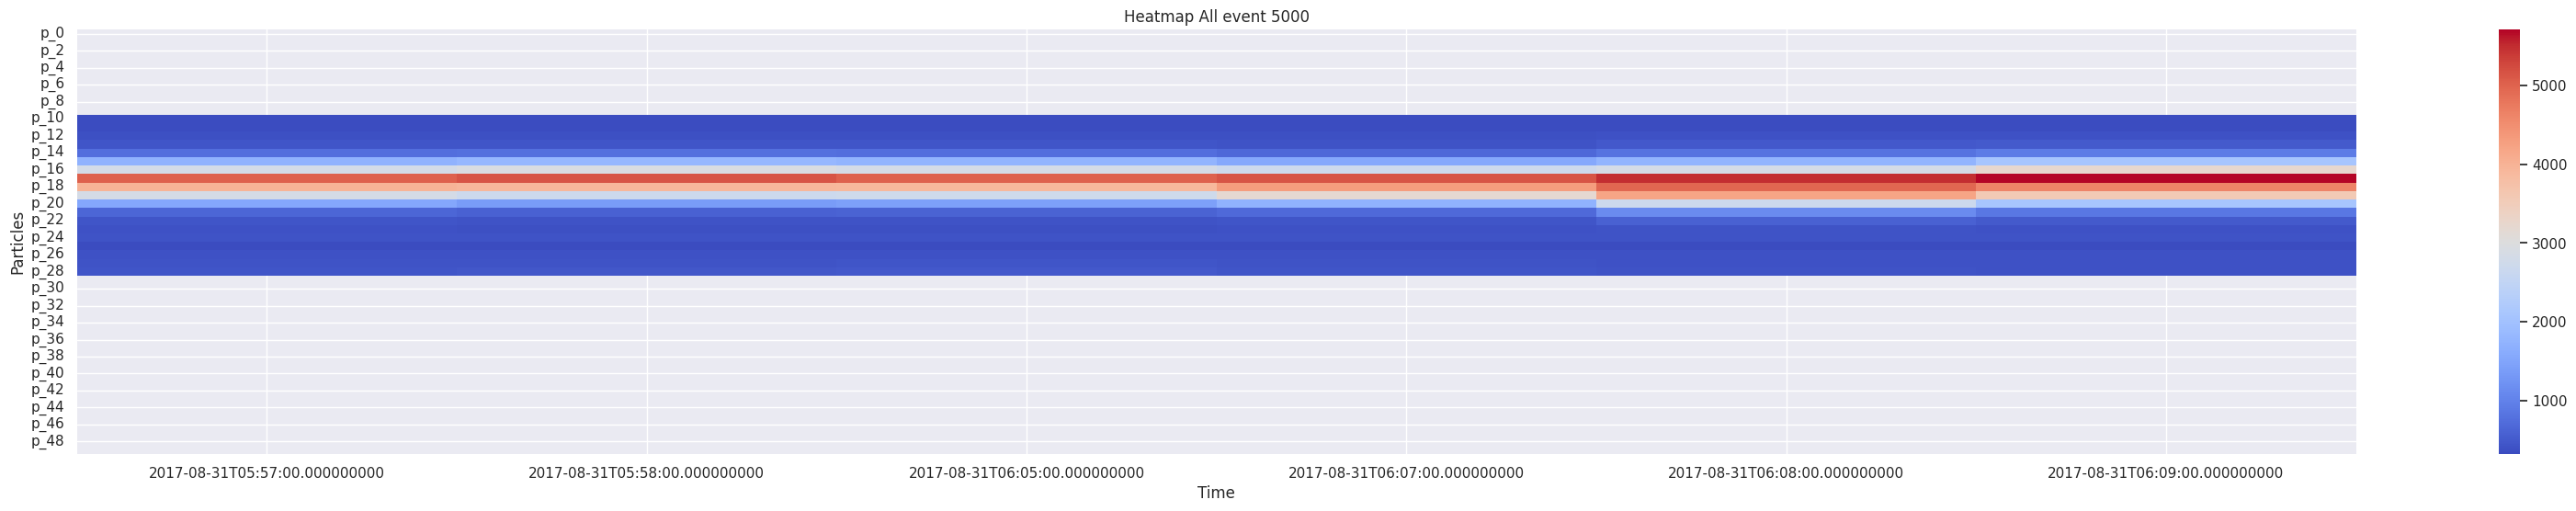

In [128]:
df_ev_5000 = df_ev[df_ev.gt(5000).any(axis=1)].T

plt.figure(figsize=(40, 6))
sns.heatmap(df_ev_5000, cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Particles')
plt.title('Heatmap All event 5000')
plt.show()

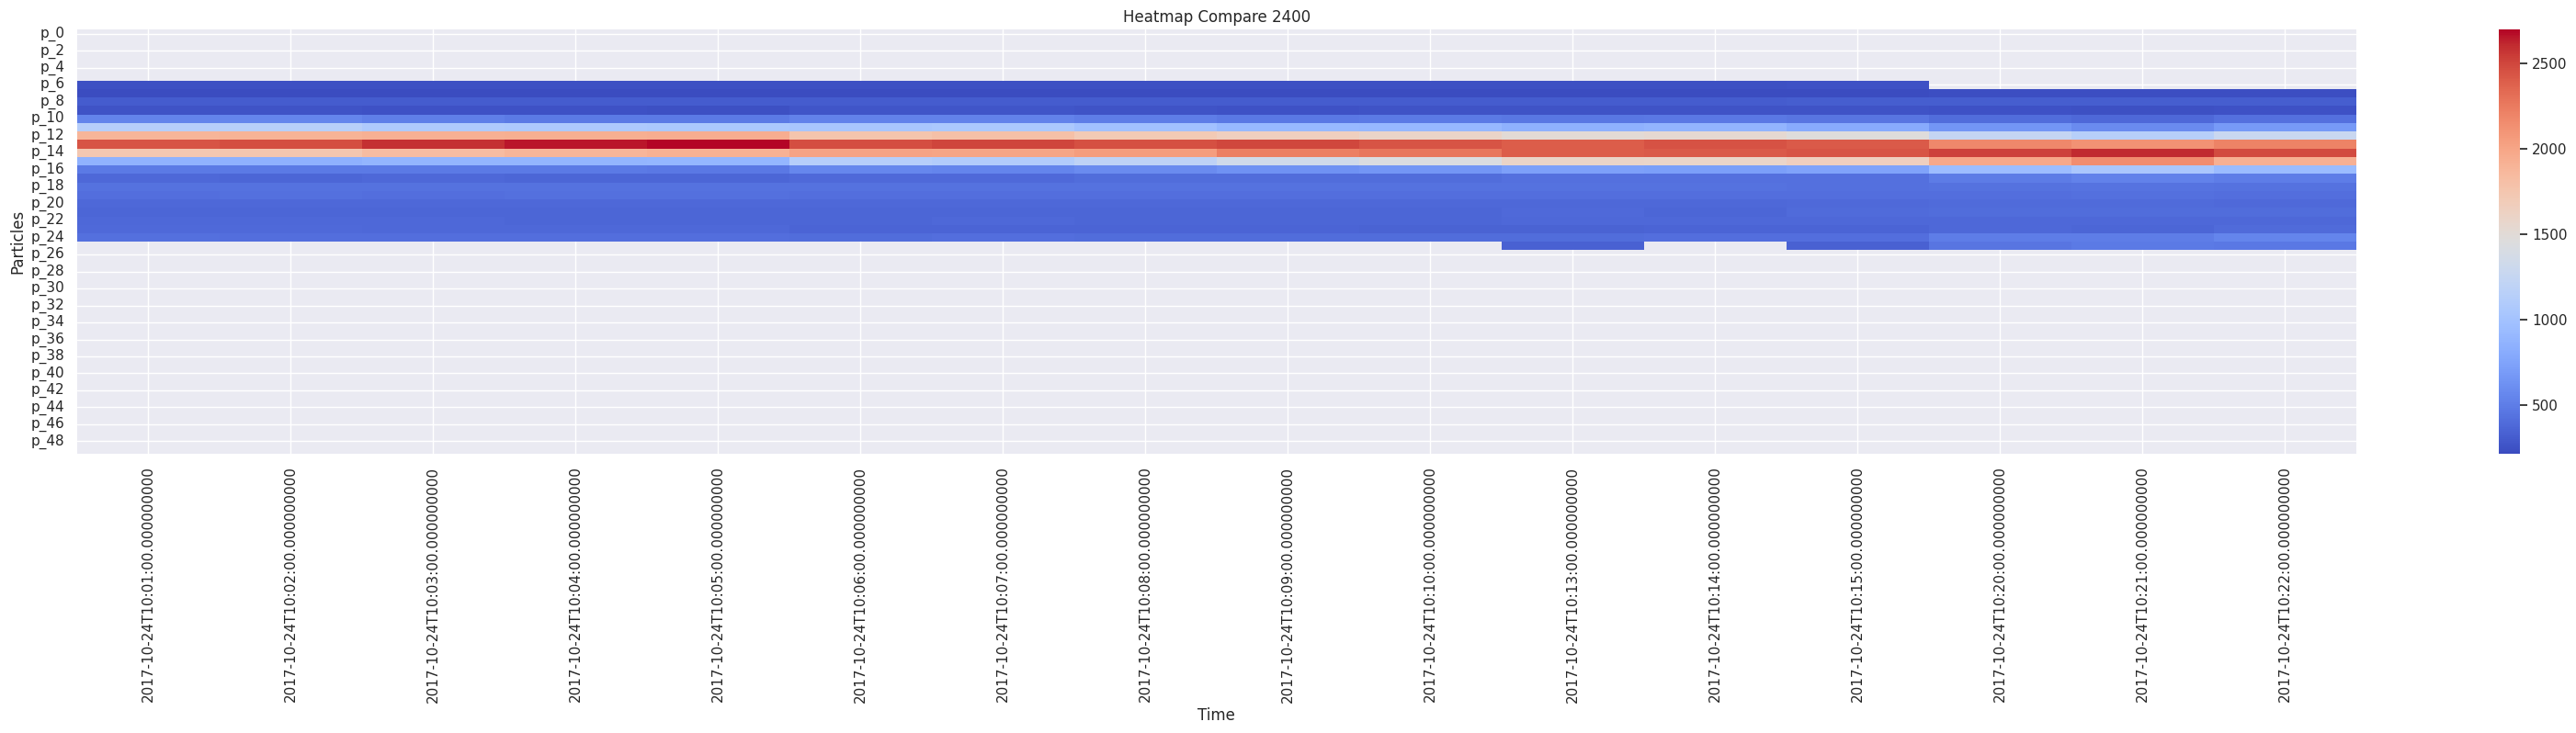

In [129]:
df_cp_2400 = df_cp[df_cp.gt(2400).any(axis=1)].T

plt.figure(figsize=(40, 6))
sns.heatmap(df_cp_2400, cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Particles')
plt.title('Heatmap Compare 2400')
plt.show()